Jupyter Notebook - Processamento, segmentação e aprendizado do classificador

In [ ]:
# baixando as versões compatíveis

# JOBLIB
print("JOBLIB")

import joblib
print(joblib.__version__)

!pip uninstall joblib

!pip install joblib==0.14.1

import joblib
print(joblib.__version__)

# PYTHON
print("PYTHON")

!python --version

!apt-get install python3.7

!update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1

!apt-get install python3.7-distutils
!wget https://bootstrap.pypa.io/get-pip.py
!python3.7 get-pip.py

!python --version

# SCIKIT
print("SCIKIT")

import sklearn
print(sklearn.__version__)

!pip show scikit-learn

!pip uninstall scikit-learn==1.2.2

!pip3.7 install scikit-learn==0.22.1

import sklearn
print(sklearn.__version__)

!pip show scikit-learn

Mounted at /content/drive


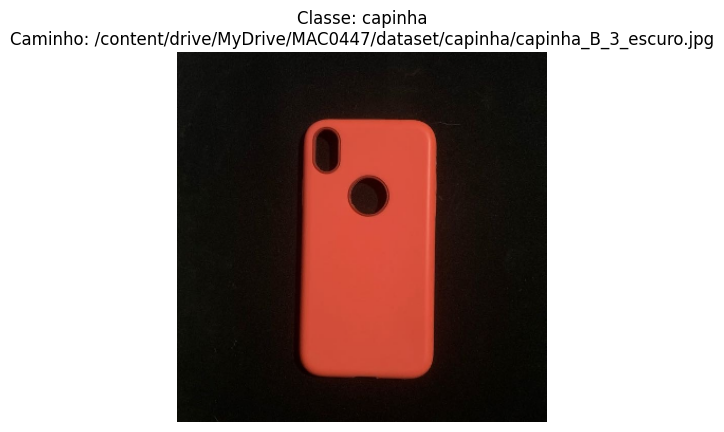

In [ ]:
from google.colab import drive
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

drive.mount('/content/drive')

drive_path = '/content/drive/MyDrive'
dataset_folder = os.path.join(drive_path, 'MAC0447/dataset')

imagens = []

for classe_folder in os.listdir(dataset_folder):
    classe_path = os.path.join(dataset_folder, classe_folder)

    if os.path.isdir(classe_path):
        for image_filename in os.listdir(classe_path):
            image_path = os.path.join(classe_path, image_filename)
            if os.path.isfile(image_path) and image_filename.lower().endswith('.jpg'):

                img = mpimg.imread(image_path)
                img = cv2.resize(img, (350, 350))
                imagens.append({
                    'classe': classe_folder,
                    'caminho': image_path,
                    'imagem': img
                })

imagens = np.array(imagens)

index_img = 56
plt.imshow(imagens[index_img]['imagem'])
plt.title(f"Classe: {imagens[index_img]['classe']}\nCaminho: {imagens[index_img]['caminho']}")
plt.axis('off')
plt.show()

In [ ]:
# função para plot das imagens

def plot(index_img, imagens, imagens_mod, titulo):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(imagens_mod[index_img]['imagem'], cmap='gray')
    axs[0].set_title(f"{titulo}\n{imagens_mod[index_img]['caminho']}")
    axs[0].axis('off')

    axs[1].imshow(imagens[index_img]['imagem'], cmap='gray')
    axs[1].set_title(f"Imagem original")
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

**Data augmentation** é um conjunto de técnicas utilizadas para aumentar o número de dados realizando cópias das imagens já existentes com pequenas modificações.

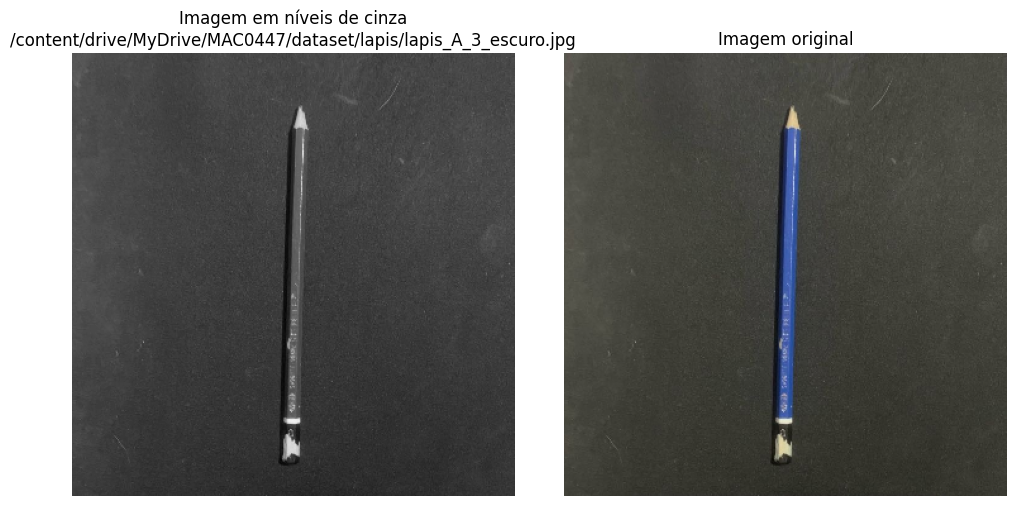

In [ ]:
# data augmentation: níveis de cinza

import cv2

def RGB2GRAY(imagem):
    imagem_colorida = imagem['imagem']
    imagem_cinza = cv2.cvtColor(imagem_colorida, cv2.COLOR_RGB2GRAY)
    imagem_resultado = {
        'classe': imagem['classe'],
        'caminho': imagem['caminho'],
        'imagem': imagem_cinza
    }
    return imagem_resultado

imagens_cinza = []
for imagem in imagens:
    imagem_processada = RGB2GRAY(imagem)
    imagens_cinza.append(imagem_processada)
imagens_cinza = np.array(imagens_cinza)

plot(0, imagens, imagens_cinza, "Imagem em níveis de cinza")

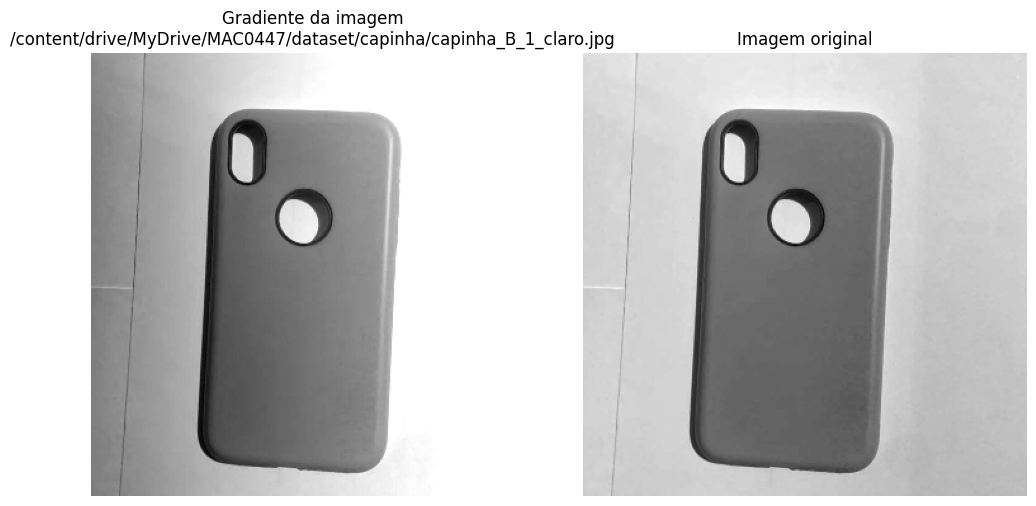

In [ ]:
# data augmentation: soma de fundo com gradiente de níveis de cinza

def gradiente(imagem):
    imagem_cinza = imagem['imagem']
    altura, largura = imagem_cinza.shape

    fundo = np.zeros((altura, largura), dtype=np.uint8)
    gradiente = np.linspace(0, 122, largura)

    for i in range(altura):
        fundo[i, :] = gradiente

    imagem_gradiente = cv2.add(imagem_cinza, fundo)

    imagem_resultado = {
        'classe': imagem['classe'],
        'caminho': imagem['caminho'],
        'imagem': imagem_gradiente
    }

    return imagem_resultado

imagens_gradiente = []
for imagem in imagens_cinza:
    imagem_processada = gradiente(imagem)
    imagens_gradiente.append(imagem_processada)
imagens_gradiente = np.array(imagens_gradiente)

plot(64, imagens_cinza, imagens_gradiente, "Gradiente da imagem")

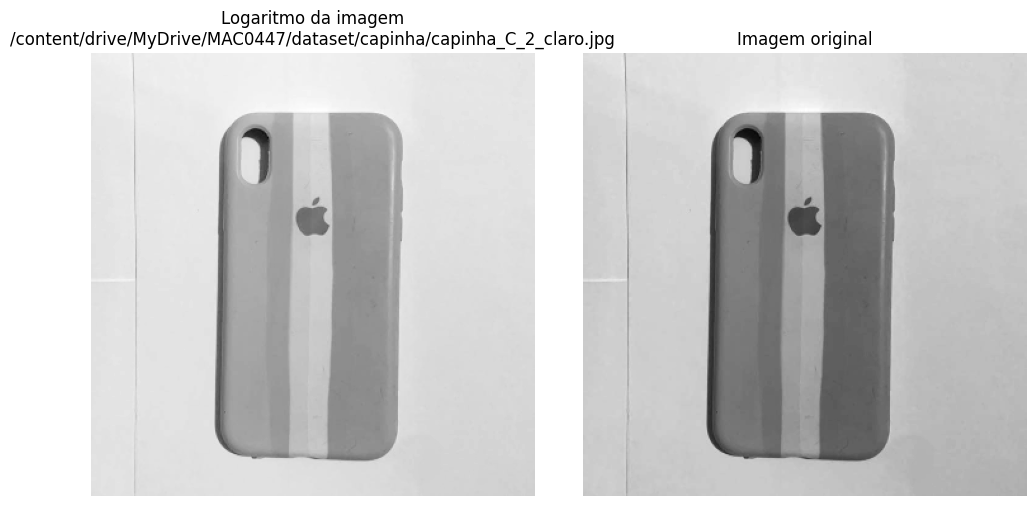

In [ ]:
# data augmentation: logaritmo da imagem

def logaritmo(imagem):
    imagem_cinza = imagem['imagem']
    imagem_log = np.log1p(imagem_cinza)

    imagem_resultado = {
        'classe': imagem['classe'],
        'caminho': imagem['caminho'],
        'imagem': imagem_log
    }

    return imagem_resultado

imagens_log = []
for imagem in imagens_cinza:
    imagem_processada = logaritmo(imagem)
    imagens_log.append(imagem_processada)
imagens_log = np.array(imagens_log)

plot(70, imagens_cinza, imagens_log, "Logaritmo da imagem")


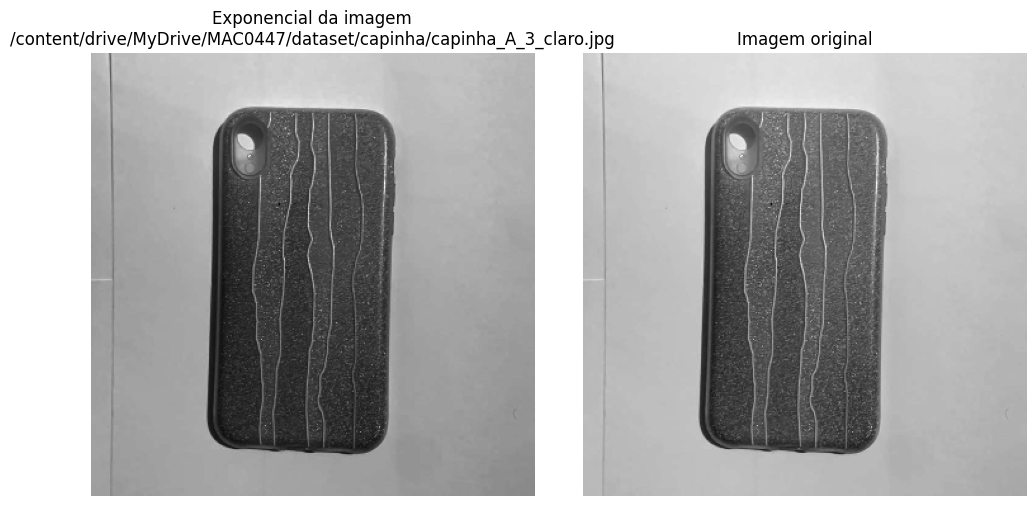

In [ ]:
# data augmentation: exponencial da imagem

def exponencial(imagem):
    imagem_cinza = imagem['imagem']

    imagem_normalizada = (imagem_cinza - np.min(imagem_cinza)) / (np.max(imagem_cinza) - np.min(imagem_cinza))
    imagem_exp = np.exp(imagem_normalizada)

    imagem_resultado = {
        'classe': imagem['classe'],
        'caminho': imagem['caminho'],
        'imagem': imagem_exp
    }

    return imagem_resultado

imagens_exp = []
for imagem in imagens_cinza:
    imagem_processada = exponencial(imagem)
    imagens_exp.append(imagem_processada)
imagens_exp = np.array(imagens_exp)

plot(69, imagens_cinza, imagens_exp, "Exponencial da imagem")


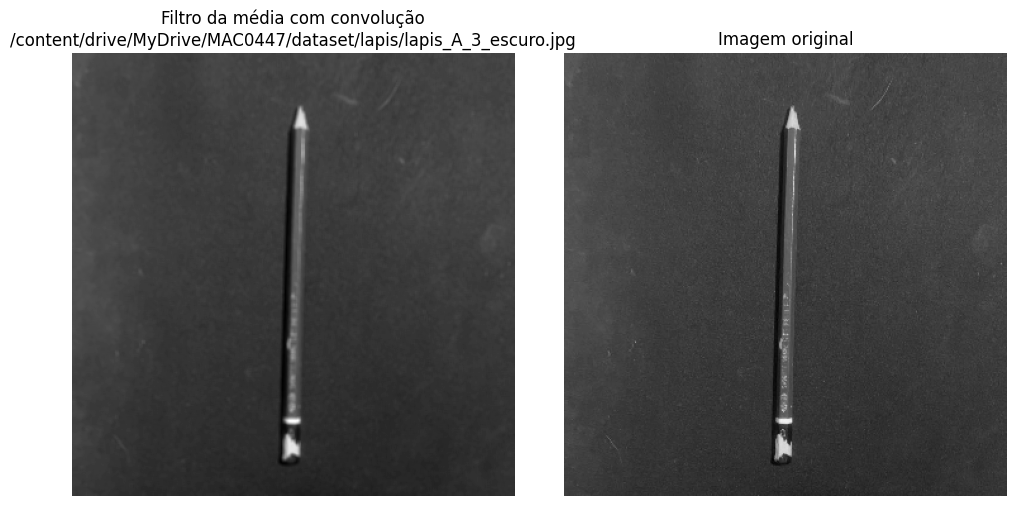

In [ ]:
# data augmentation: filtro da média implementado usando convolução

from scipy.signal import convolve2d

def media_convolucao(imagem):
    imagem_cinza = imagem['imagem']

    kernel = np.ones((3, 3)) / 3**2

    imagem_media = convolve2d(imagem_cinza, kernel, mode='same', boundary='symm')

    imagem_resultado = {
        'classe': imagem['classe'],
        'caminho': imagem['caminho'],
        'imagem': imagem_media
    }

    return imagem_resultado

imagens_media = []
for imagem in imagens_cinza:
    imagem_processada = media_convolucao(imagem)
    imagens_media.append(imagem_processada)
imagens_media = np.array(imagens_media)

plot(0, imagens_cinza, imagens_media, "Filtro da média com convolução")


In [ ]:
# conjunto dos grupos de imagens formados

data_augumentation = np.concatenate((imagens_cinza, imagens_gradiente, imagens_log, imagens_exp, imagens_media))


Normalização das imagens para cada classe no conjunto de dados (augmentedDataSet). Equalização de histogramas como método inicial de normalização, gerando assim um conjunto de dados normalizado **normalizedDataset**.

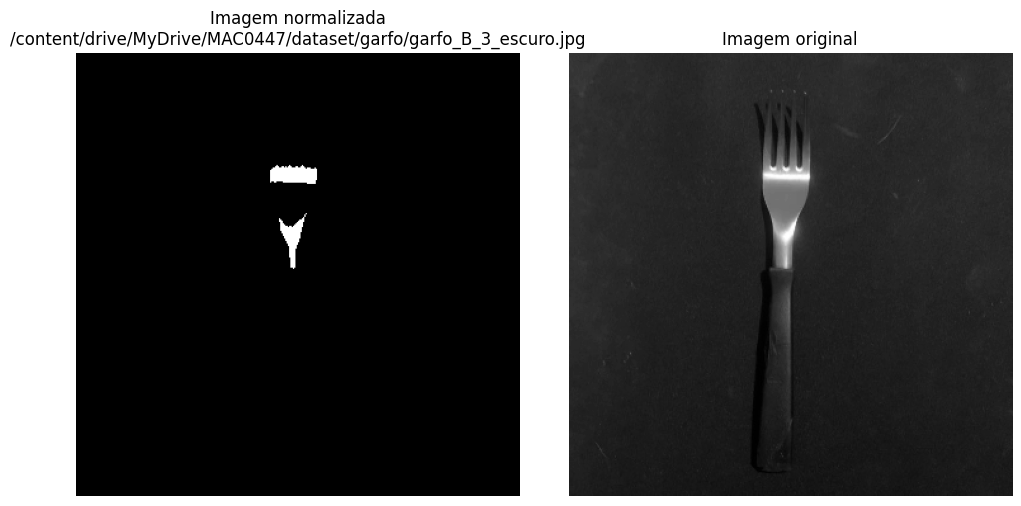

In [ ]:
# pré-processamento e normalização

def normalizacao(imagem):
    imagem_cinza = imagem['imagem']

    imagem_cinza = imagem_cinza.astype(np.uint8)
    imagem_normalizada = cv2.equalizeHist(imagem_cinza)

    imagem_resultado = {
        'classe': imagem['classe'],
        'caminho': imagem['caminho'],
        'imagem': imagem_normalizada
    }

    return imagem_resultado

imagens_normalizadas = []
for imagem in data_augumentation:
    imagem_processada = normalizacao(imagem)
    imagens_normalizadas.append(imagem_processada)
imagens_normalizadas = np.array(imagens_normalizadas)

plot(345, data_augumentation, imagens_normalizadas, "Imagem normalizada")

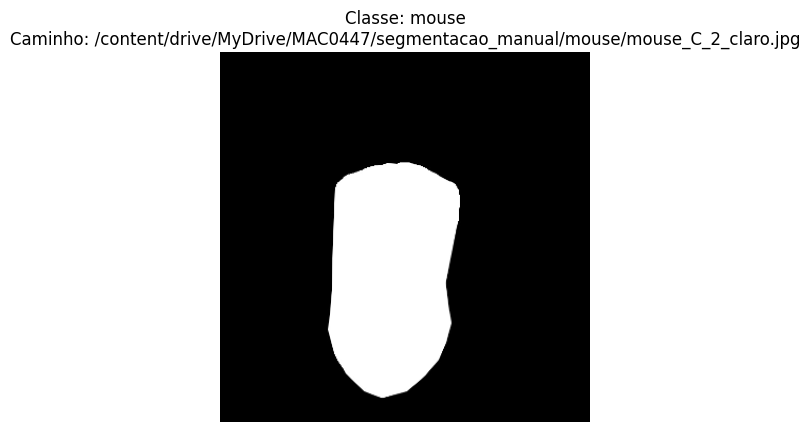

In [ ]:
import shutil

def segmentacao_manual(imagens, caminho):
    # salva imagens em um diretório para realizar a segmentação manual

    if not os.path.exists(caminho):
        os.makedirs(caminho)

    classes = np.unique([imagem['classe'] for imagem in imagens])

    for classe in classes:
        imagens_da_classe = [imagem for imagem in imagens if imagem['classe'] == classe]
        num_imagens = int(len(imagens_da_classe) * (15 / 100))
        imagens_selecionadas = np.random.choice(imagens_da_classe, num_imagens, replace=False)

        caminho_classe = os.path.join(caminho, classe)
        if not os.path.exists(caminho_classe):
            os.makedirs(caminho_classe)

        for imagem in imagens_selecionadas:
            caminho_imagem = imagem['caminho']
            nome_do_arquivo = os.path.basename(caminho_imagem)
            caminho_salvar = os.path.join(caminho_classe, nome_do_arquivo)
            shutil.copyfile(caminho_imagem, caminho_salvar)

    shutil.make_archive('segmentacao_manual', 'zip', caminho)


    # cria o array com as imagens segmentadas manualmente

    drive_path = '/content/drive/MyDrive'
    dataset_folder = os.path.join(drive_path, 'MAC0447/segmentacao_manual')

    imagens_seg_manual = []

    for classe_folder in os.listdir(dataset_folder):
        classe_path = os.path.join(dataset_folder, classe_folder)

        if os.path.isdir(classe_path):
            for image_filename in os.listdir(classe_path):
                image_path = os.path.join(classe_path, image_filename)
                if os.path.isfile(image_path) and image_filename.lower().endswith('.jpg'):

                    img = mpimg.imread(image_path)
                    img = cv2.resize(img, (350, 350))
                    imagens_seg_manual.append({
                        'classe': classe_folder,
                        'caminho': image_path,
                        'imagem': img
                    })

    imagens_seg_manual = np.array(imagens_seg_manual)

    return imagens_seg_manual

imagens_seg_manual = segmentacao_manual(imagens, 'segmentacao_manual')

imgs = []
for imagem in imagens_seg_manual:
    imagem_processada = RGB2GRAY(imagem)
    imgs.append(imagem_processada)
imagens_seg_manual = np.array(imgs)

index_img = 0
plt.imshow(imagens_seg_manual[index_img]['imagem'], cmap='gray')
plt.title(f"Classe: {imagens_seg_manual[index_img]['classe']}\nCaminho: {imagens_seg_manual[index_img]['caminho']}")
plt.axis('off')
plt.show()

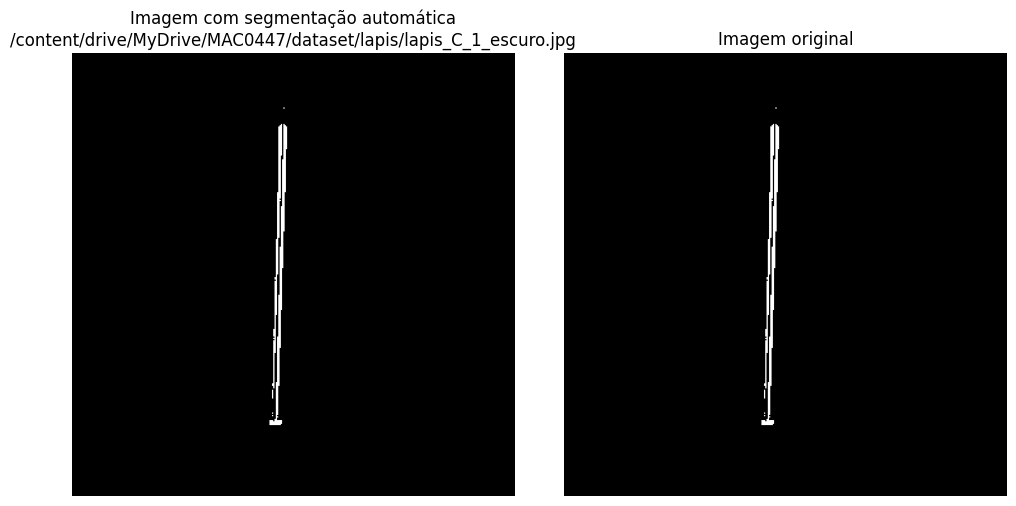

In [ ]:
# segmentação automática

def segmentacao_automatica(imagem):
    imagem_cinza = imagem['imagem']

    _, imagem_seg = cv2.threshold(imagem_cinza, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    imagem_resultado = {
        'classe': imagem['classe'],
        'caminho': imagem['caminho'],
        'imagem': imagem_seg
    }

    return imagem_resultado

imagens_seg_aut = []
for imagem in imagens_normalizadas:
    imagem_processada = segmentacao_automatica(imagem)
    imagens_seg_aut.append(imagem_processada)
imagens_seg_aut = np.array(imagens_seg_aut)

plot(278, imagens_normalizadas, imagens_seg_aut, "Imagem com segmentação automática")

5


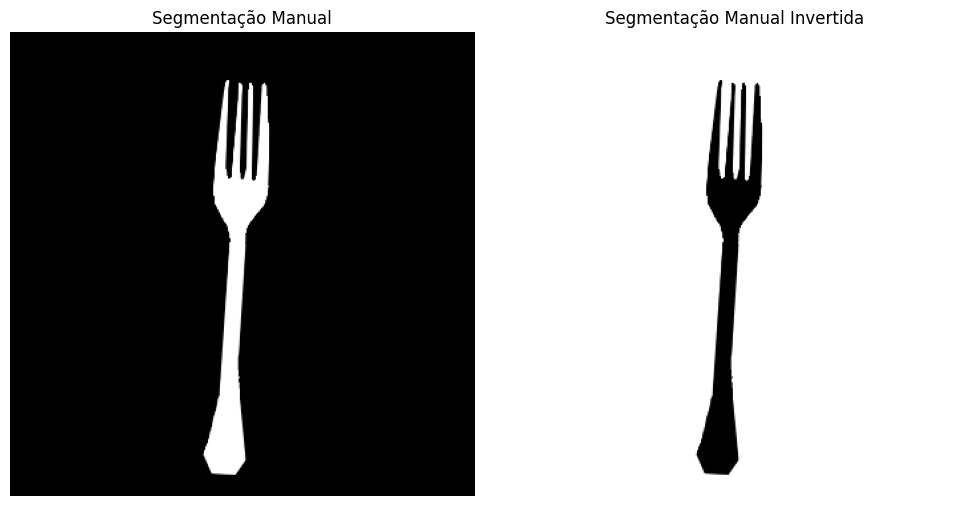

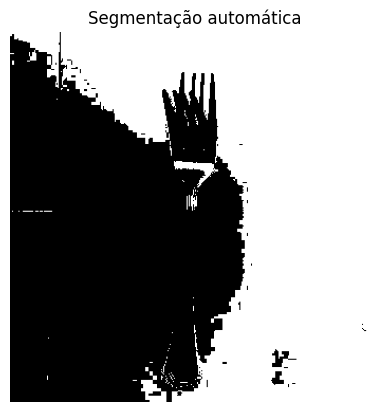

IoU Original: 1.15%, IoU Invertida: 53.74%
Discrepância para garfo_A_2_claro.jpg:
IoU Original = 1.15%, IoU Invertida = 53.74% (sobreposição insuficiente).


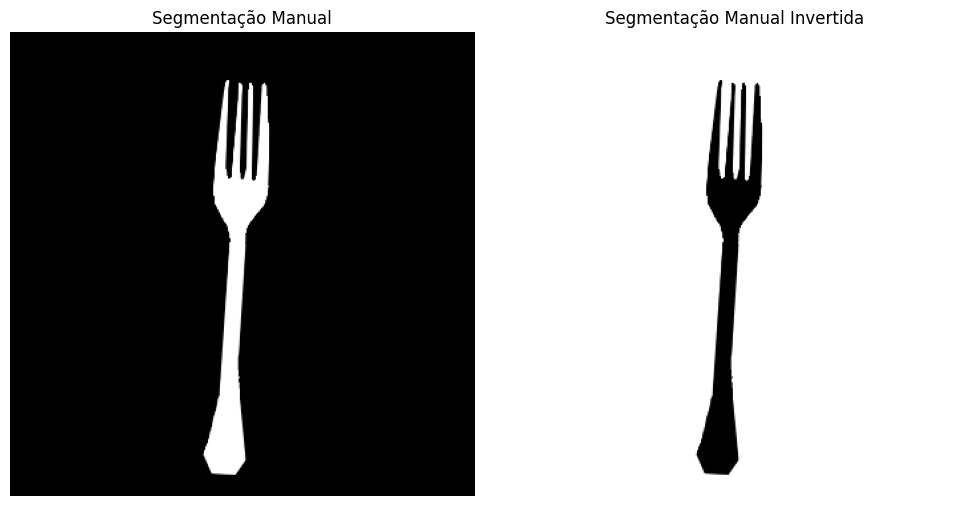

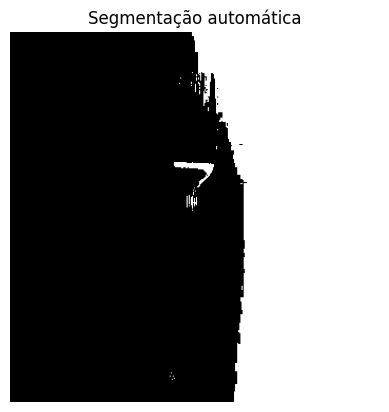

IoU Original: 0.84%, IoU Invertida: 41.75%
Discrepância para garfo_A_2_claro.jpg:
IoU Original = 0.84%, IoU Invertida = 41.75% (sobreposição insuficiente).


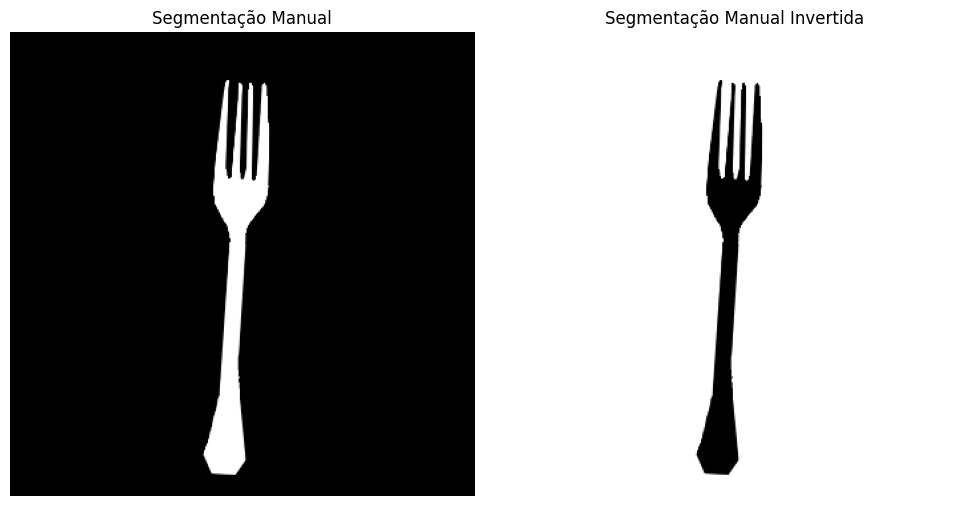

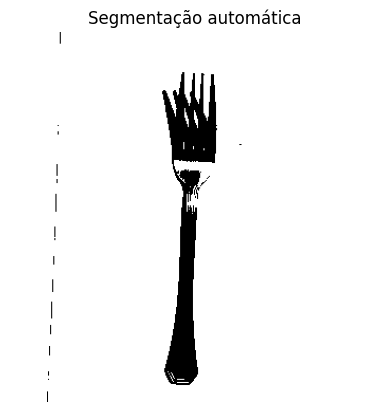

IoU Original: 1.12%, IoU Invertida: 97.42%
Correspondência para garfo_A_2_claro.jpg:
IoU Original = 1.12%, IoU Invertida = 97.42% (sobreposição suficientemente alta).


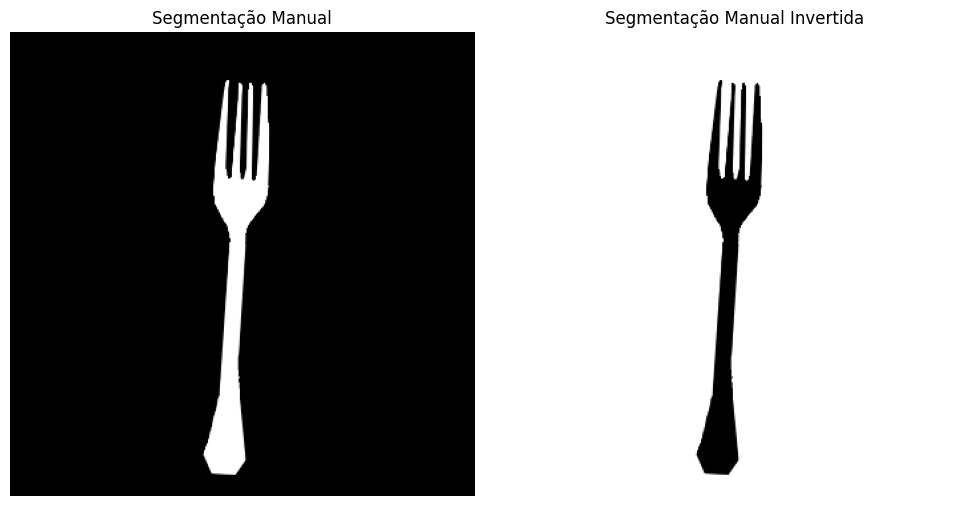

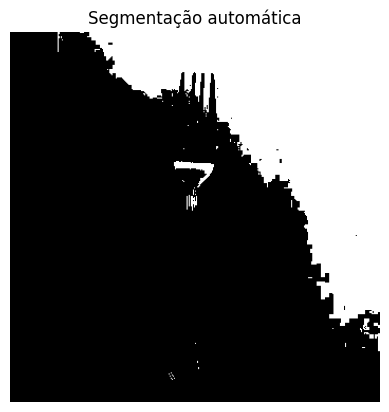

IoU Original: 1.61%, IoU Invertida: 29.03%
Discrepância para garfo_A_2_claro.jpg:
IoU Original = 1.61%, IoU Invertida = 29.03% (sobreposição insuficiente).


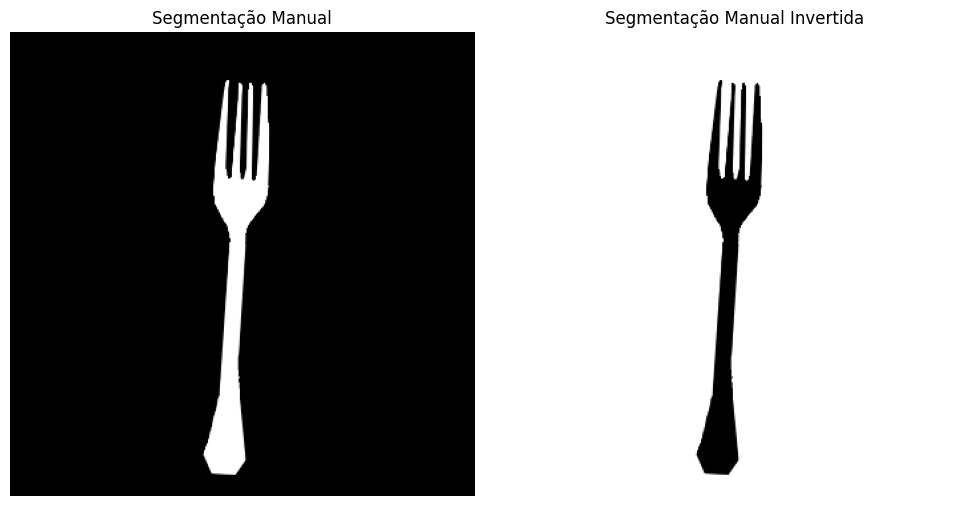

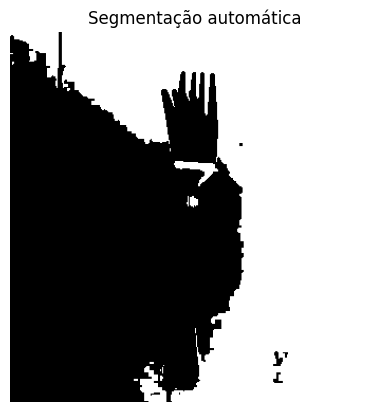

IoU Original: 0.85%, IoU Invertida: 54.16%
Discrepância para garfo_A_2_claro.jpg:
IoU Original = 0.85%, IoU Invertida = 54.16% (sobreposição insuficiente).
5


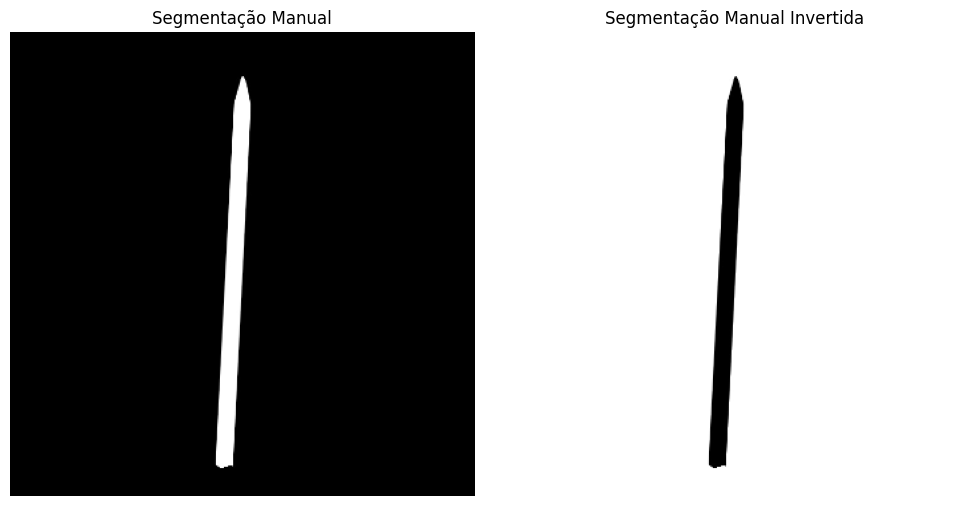

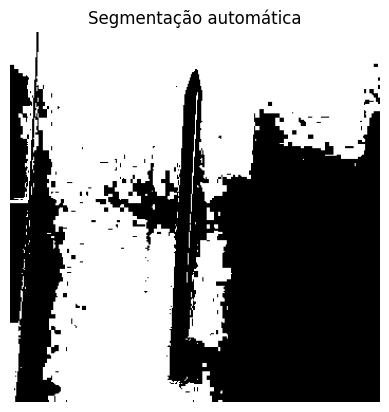

IoU Original: 0.49%, IoU Invertida: 54.63%
Discrepância para lapis_C_2_claro.jpg:
IoU Original = 0.49%, IoU Invertida = 54.63% (sobreposição insuficiente).


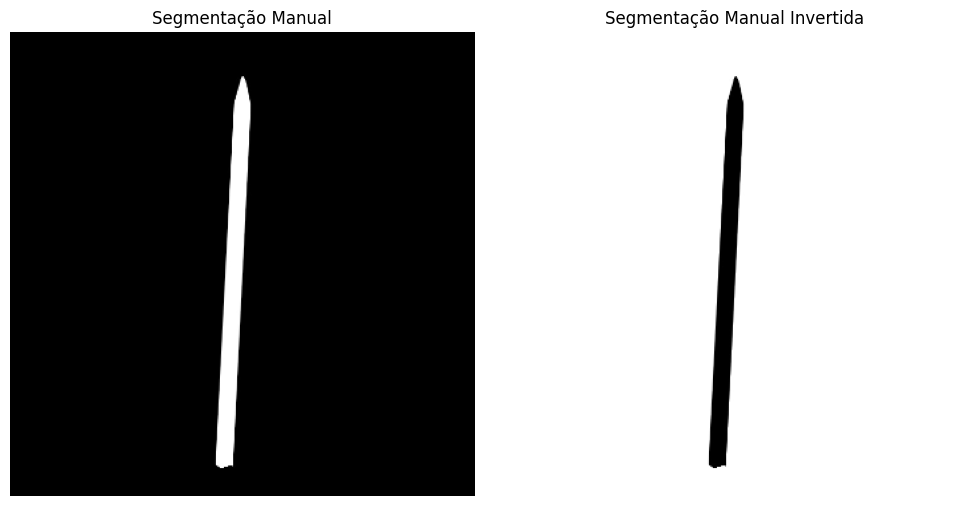

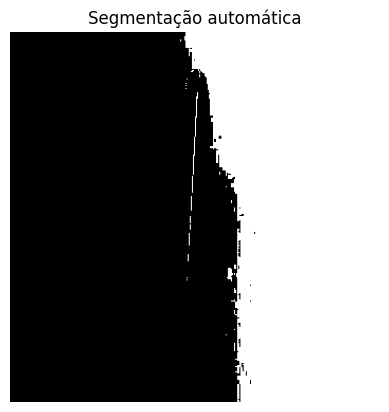

IoU Original: 0.30%, IoU Invertida: 42.85%
Discrepância para lapis_C_2_claro.jpg:
IoU Original = 0.30%, IoU Invertida = 42.85% (sobreposição insuficiente).


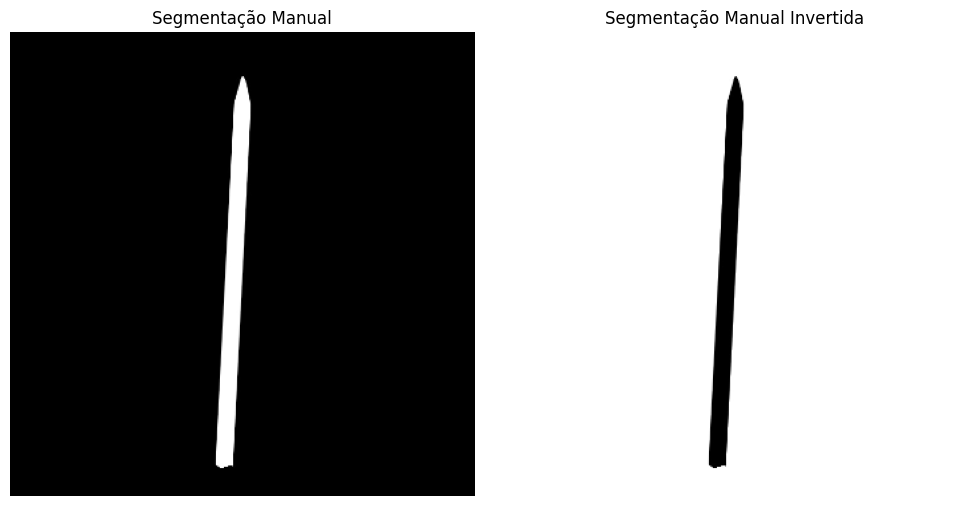

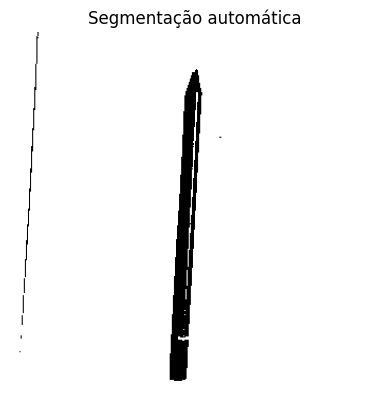

IoU Original: 0.60%, IoU Invertida: 98.09%
Correspondência para lapis_C_2_claro.jpg:
IoU Original = 0.60%, IoU Invertida = 98.09% (sobreposição suficientemente alta).


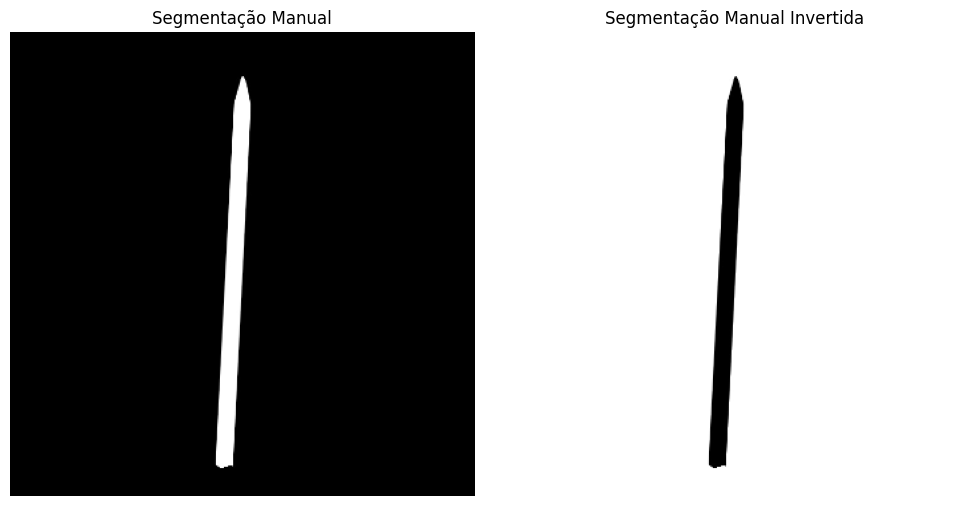

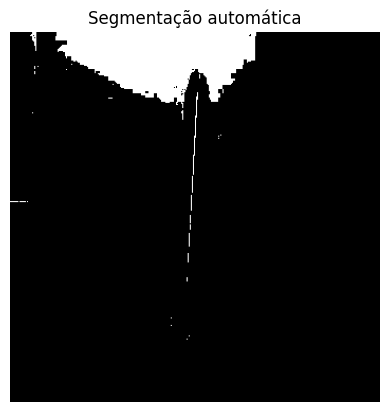

IoU Original: 1.46%, IoU Invertida: 7.27%
Discrepância para lapis_C_2_claro.jpg:
IoU Original = 1.46%, IoU Invertida = 7.27% (sobreposição insuficiente).


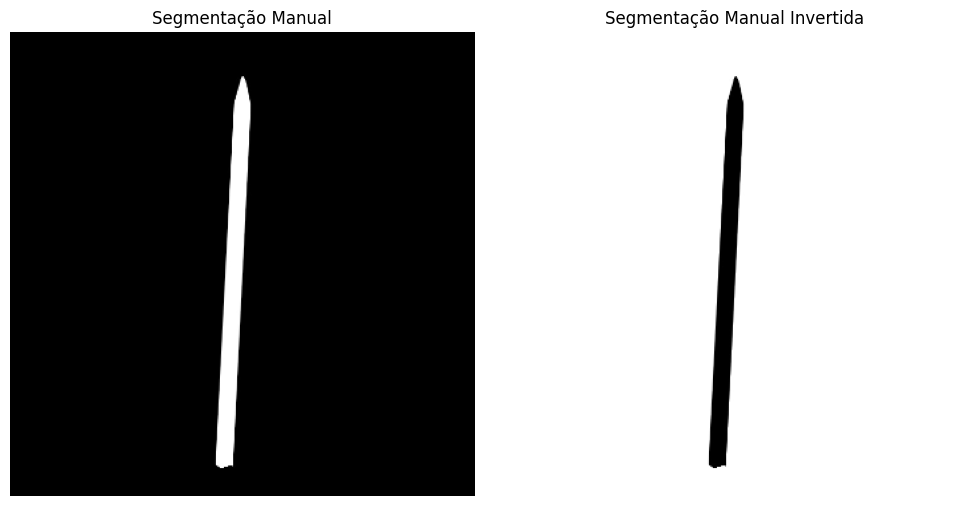

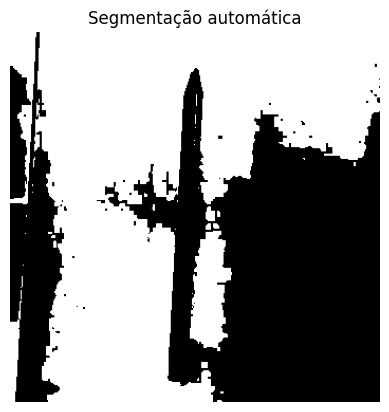

IoU Original: 0.14%, IoU Invertida: 56.37%
Discrepância para lapis_C_2_claro.jpg:
IoU Original = 0.14%, IoU Invertida = 56.37% (sobreposição insuficiente).
5


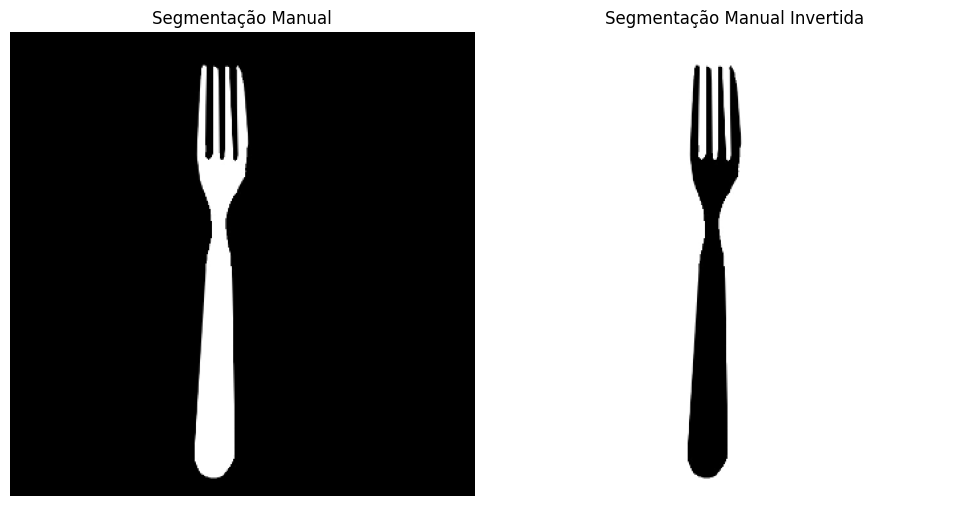

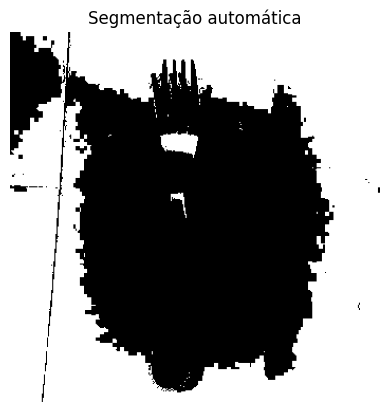

IoU Original: 1.20%, IoU Invertida: 52.78%
Discrepância para garfo_C_3_claro.jpg:
IoU Original = 1.20%, IoU Invertida = 52.78% (sobreposição insuficiente).


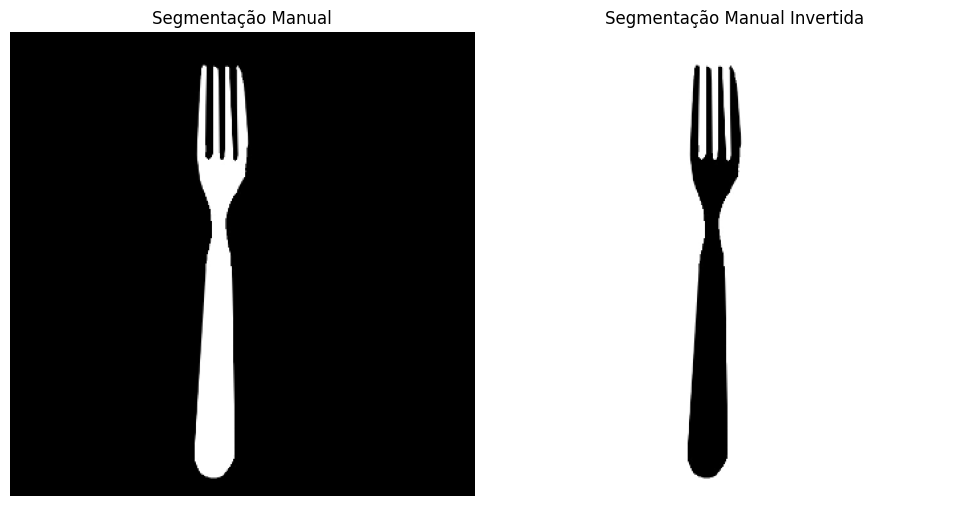

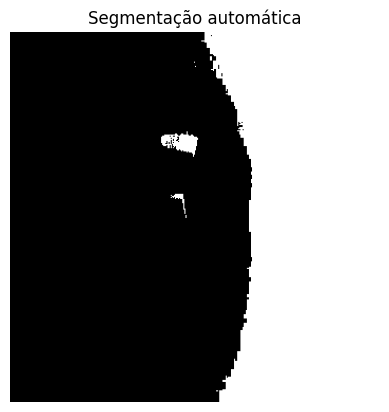

IoU Original: 0.92%, IoU Invertida: 40.16%
Discrepância para garfo_C_3_claro.jpg:
IoU Original = 0.92%, IoU Invertida = 40.16% (sobreposição insuficiente).


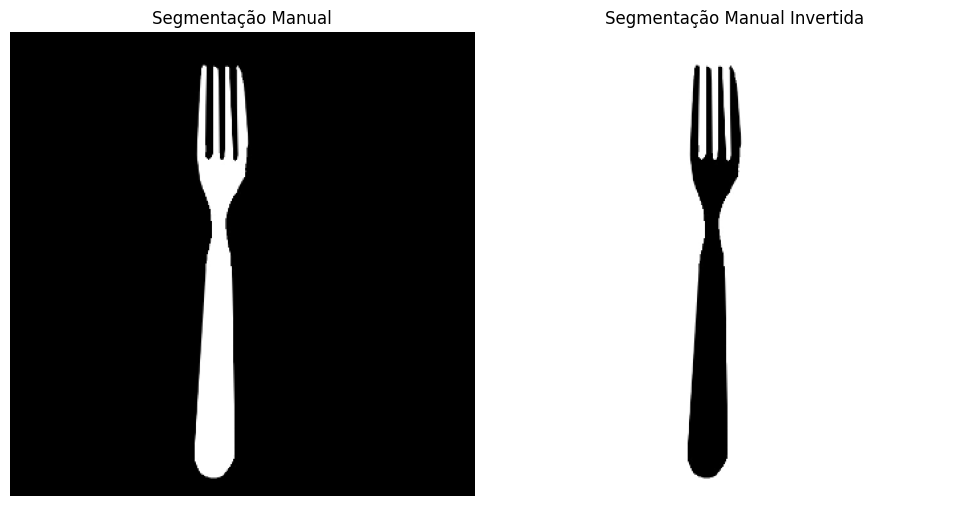

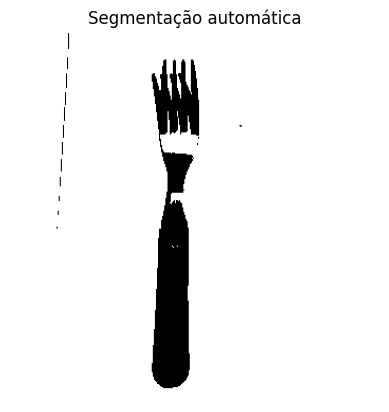

IoU Original: 1.04%, IoU Invertida: 96.88%
Correspondência para garfo_C_3_claro.jpg:
IoU Original = 1.04%, IoU Invertida = 96.88% (sobreposição suficientemente alta).


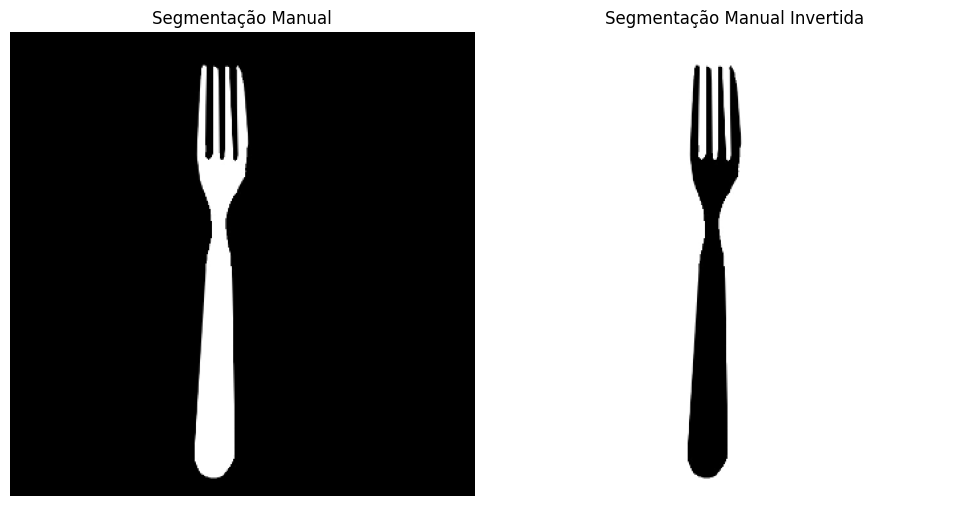

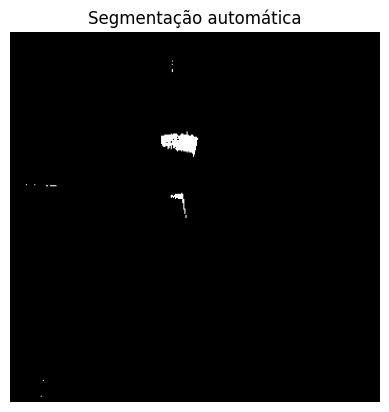

IoU Original: 6.76%, IoU Invertida: 0.11%
Discrepância para garfo_C_3_claro.jpg:
IoU Original = 6.76%, IoU Invertida = 0.11% (sobreposição insuficiente).


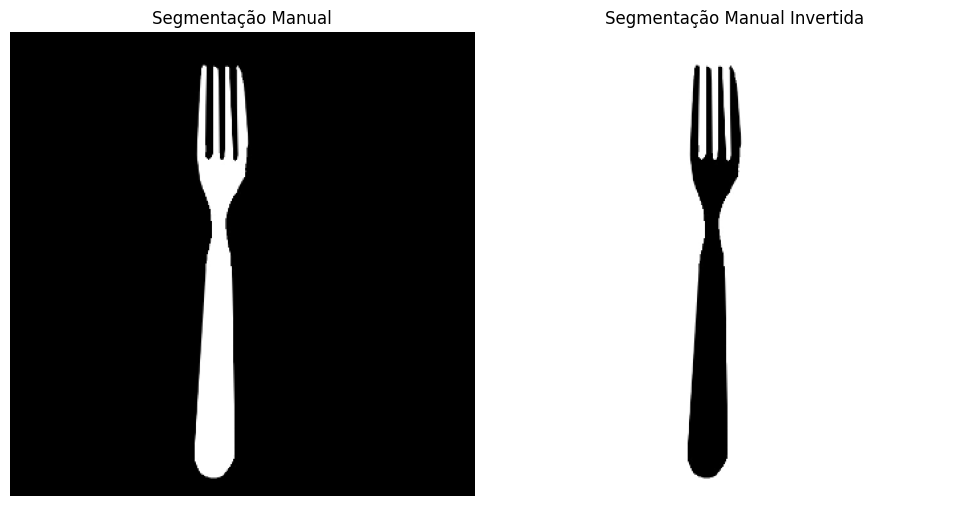

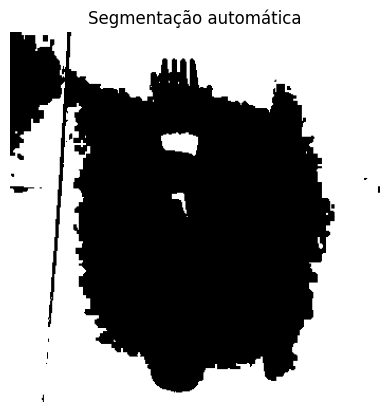

IoU Original: 1.08%, IoU Invertida: 51.02%
Discrepância para garfo_C_3_claro.jpg:
IoU Original = 1.08%, IoU Invertida = 51.02% (sobreposição insuficiente).
5


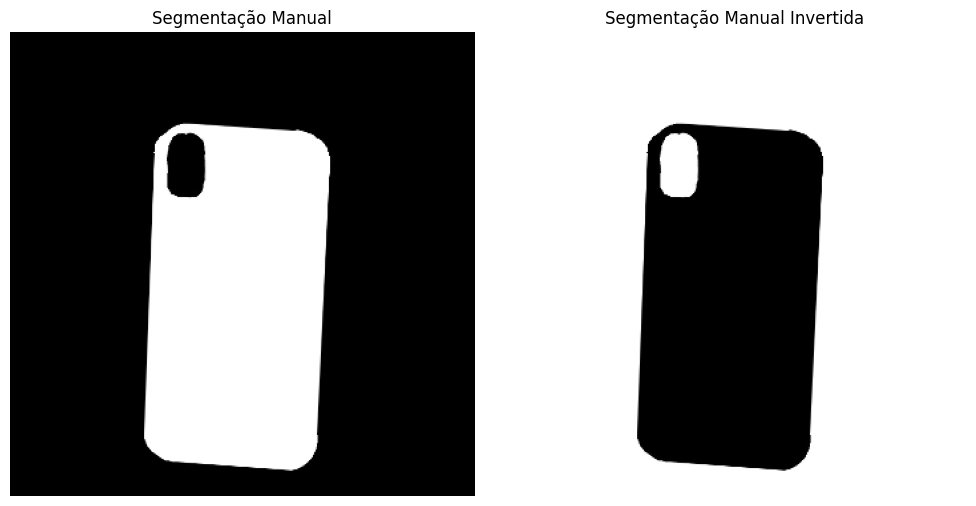

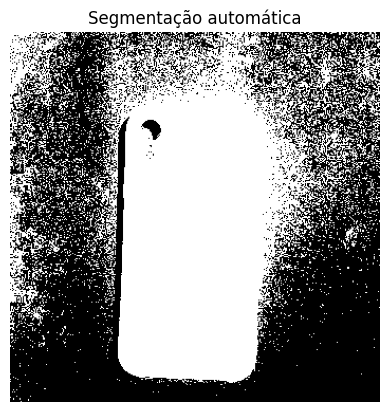

IoU Original: 51.93%, IoU Invertida: 25.25%
Discrepância para capinha_A_1_escuro.jpg:
IoU Original = 51.93%, IoU Invertida = 25.25% (sobreposição insuficiente).


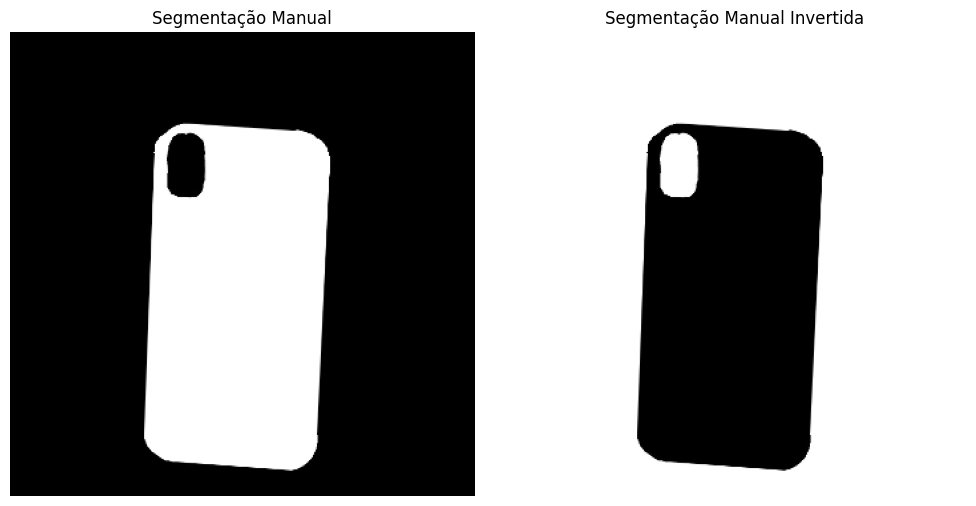

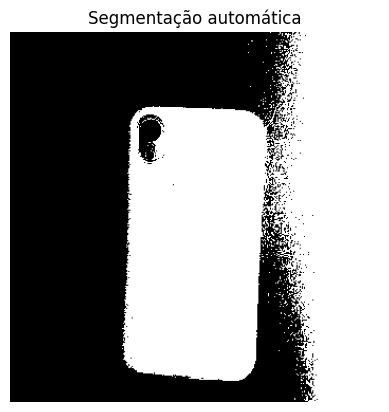

IoU Original: 47.79%, IoU Invertida: 26.75%
Discrepância para capinha_A_1_escuro.jpg:
IoU Original = 47.79%, IoU Invertida = 26.75% (sobreposição insuficiente).


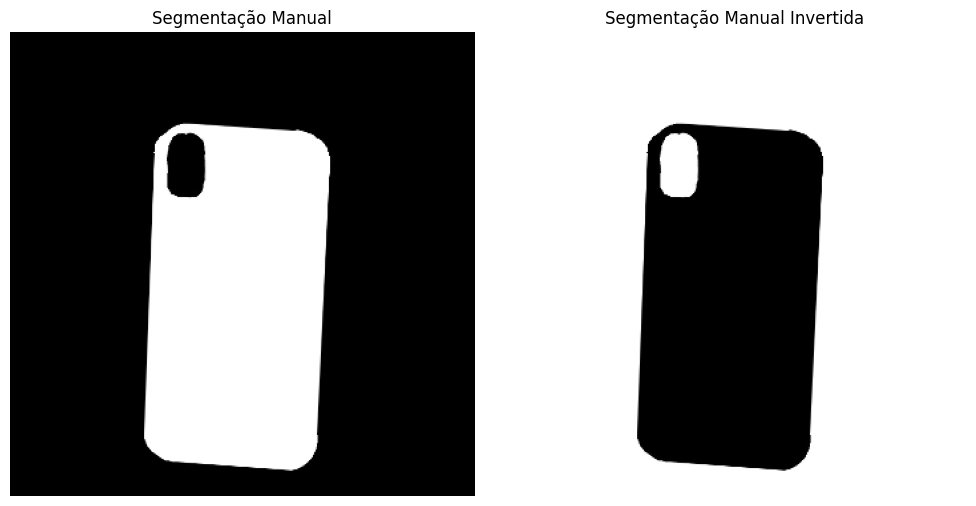

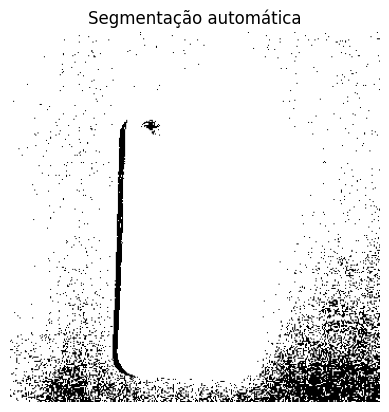

IoU Original: 28.73%, IoU Invertida: 66.71%
Discrepância para capinha_A_1_escuro.jpg:
IoU Original = 28.73%, IoU Invertida = 66.71% (sobreposição insuficiente).


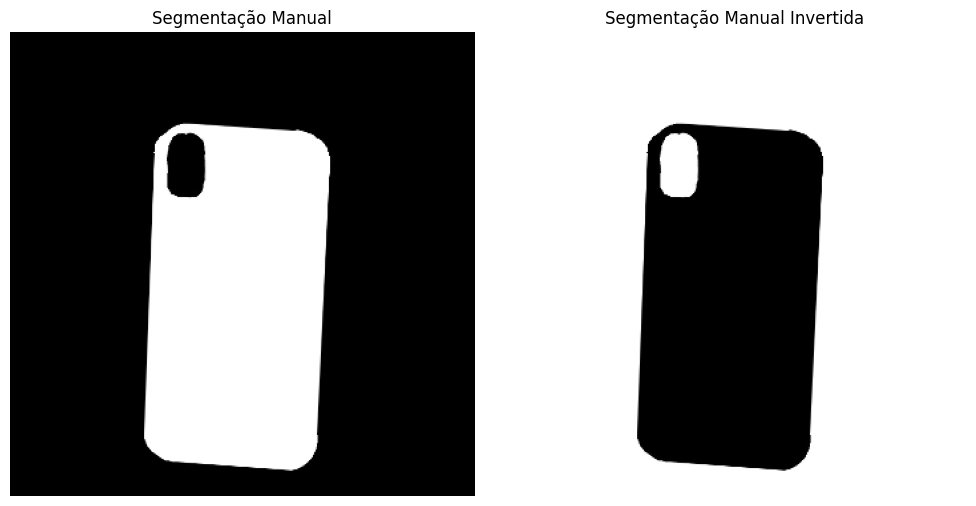

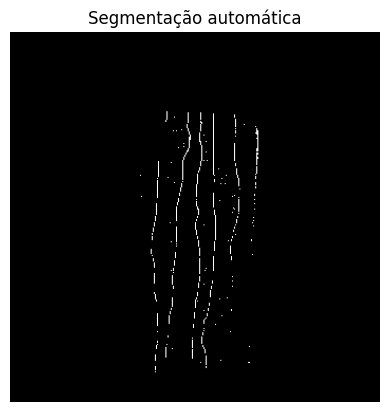

IoU Original: 2.81%, IoU Invertida: 0.00%
Discrepância para capinha_A_1_escuro.jpg:
IoU Original = 2.81%, IoU Invertida = 0.00% (sobreposição insuficiente).


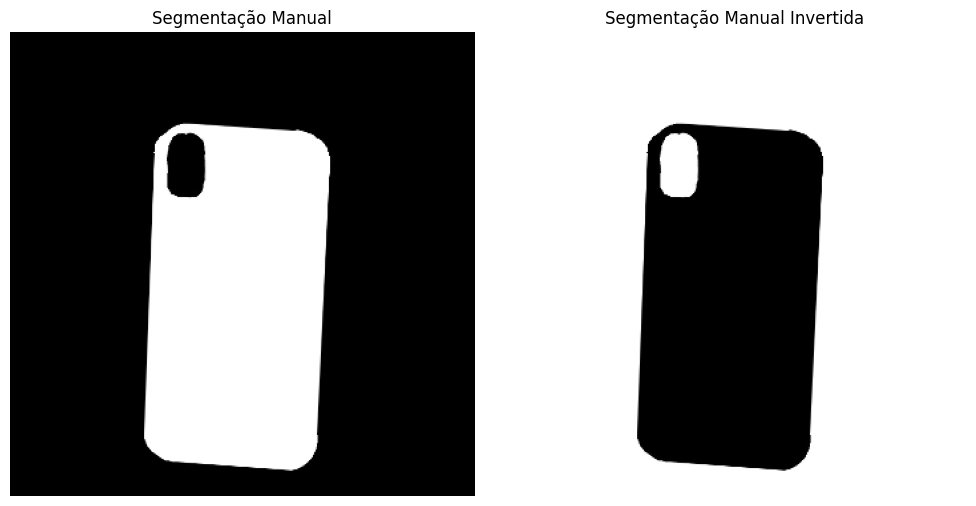

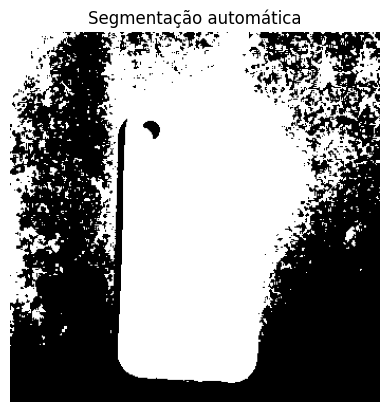

IoU Original: 49.49%, IoU Invertida: 28.02%
Discrepância para capinha_A_1_escuro.jpg:
IoU Original = 49.49%, IoU Invertida = 28.02% (sobreposição insuficiente).
5


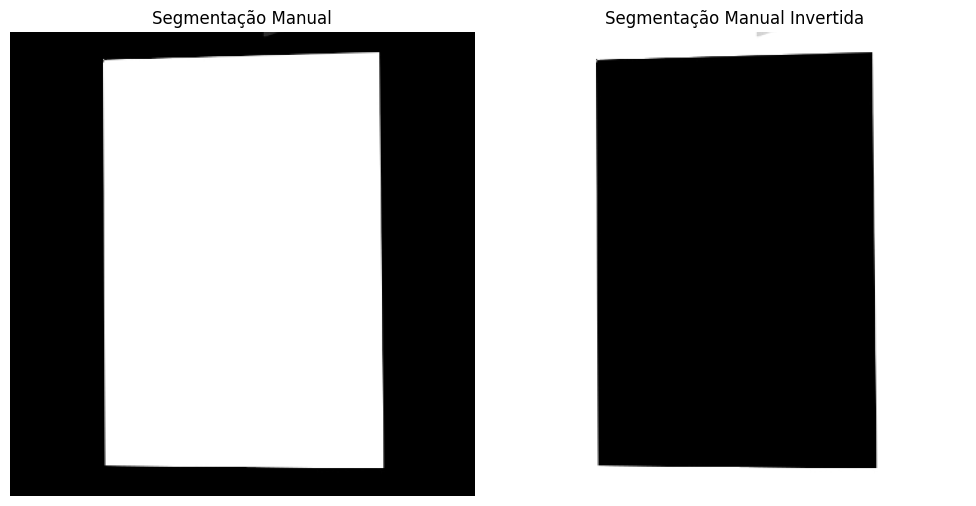

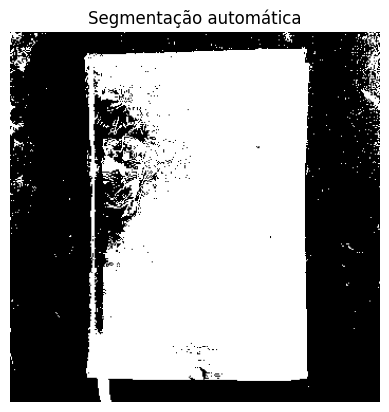

IoU Original: 86.38%, IoU Invertida: 2.61%
Correspondência para livro_C_3_escuro.jpg:
IoU Original = 86.38%, IoU Invertida = 2.61% (sobreposição suficientemente alta).


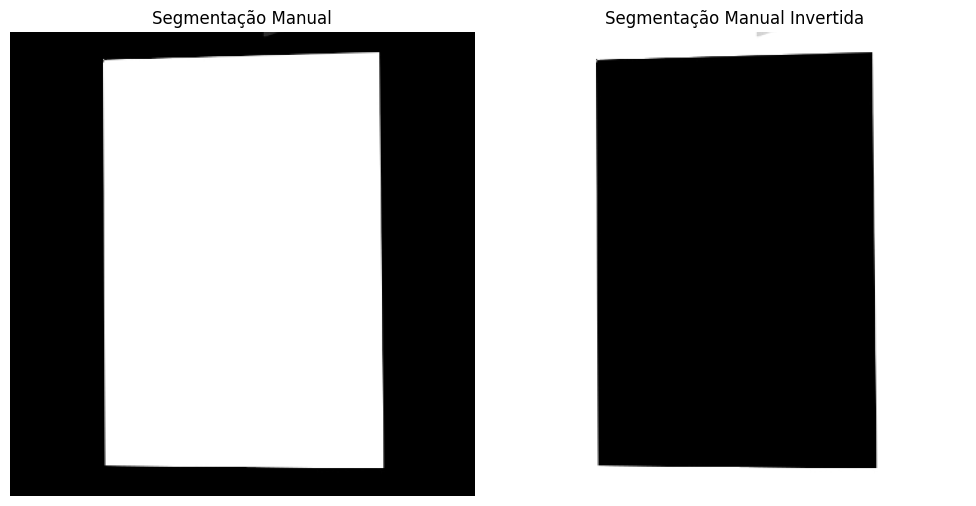

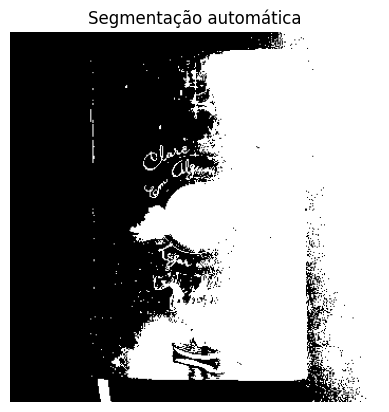

IoU Original: 42.48%, IoU Invertida: 25.21%
Discrepância para livro_C_3_escuro.jpg:
IoU Original = 42.48%, IoU Invertida = 25.21% (sobreposição insuficiente).


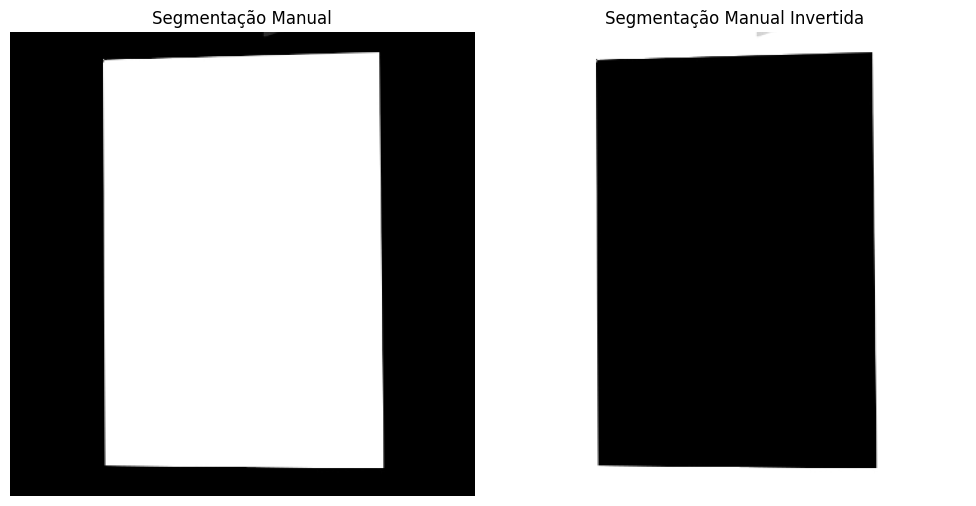

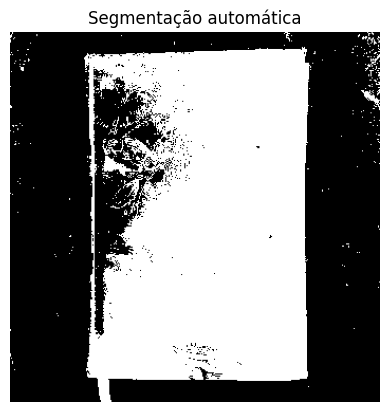

IoU Original: 83.44%, IoU Invertida: 1.74%
Correspondência para livro_C_3_escuro.jpg:
IoU Original = 83.44%, IoU Invertida = 1.74% (sobreposição suficientemente alta).


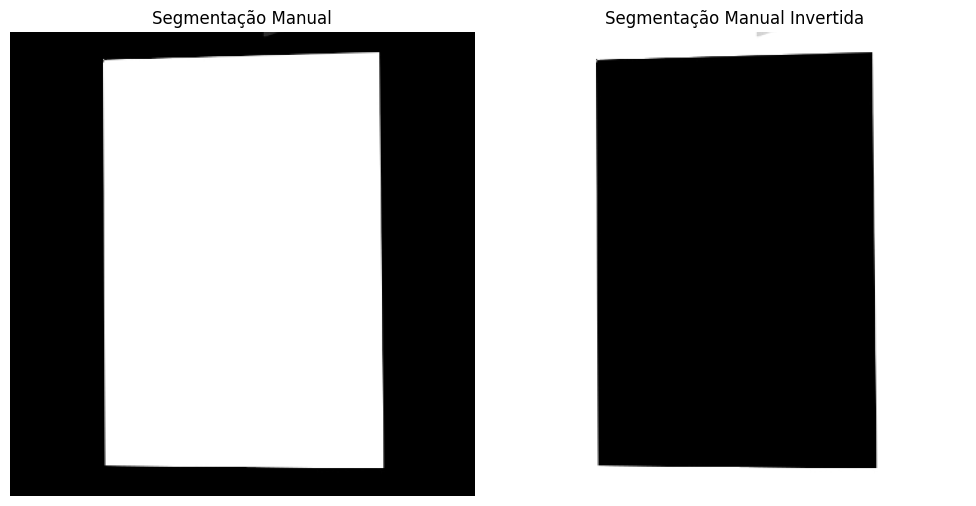

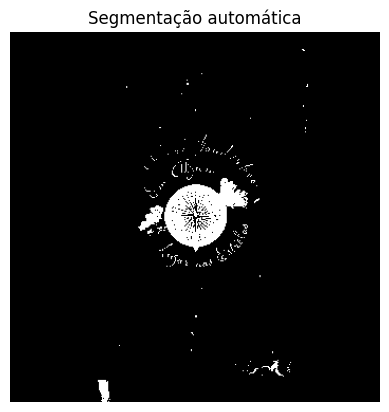

IoU Original: 5.64%, IoU Invertida: 0.29%
Discrepância para livro_C_3_escuro.jpg:
IoU Original = 5.64%, IoU Invertida = 0.29% (sobreposição insuficiente).


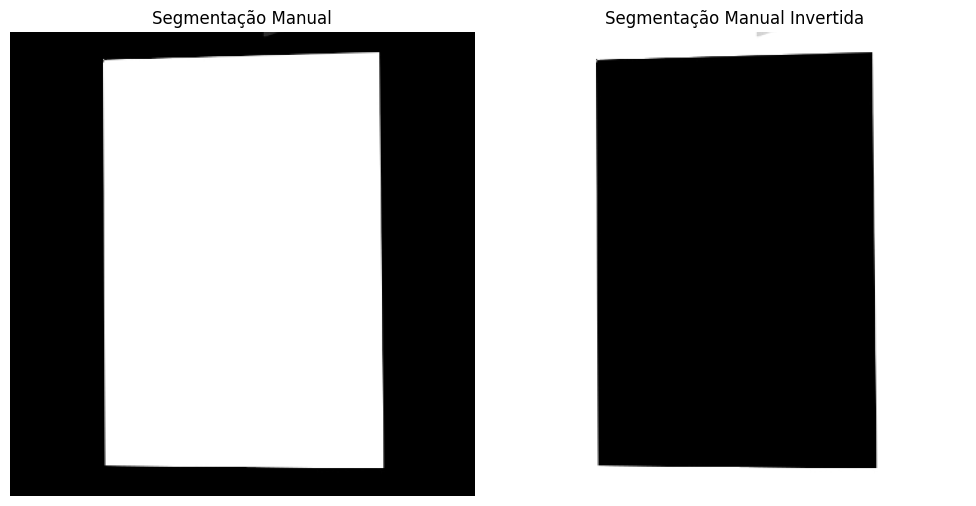

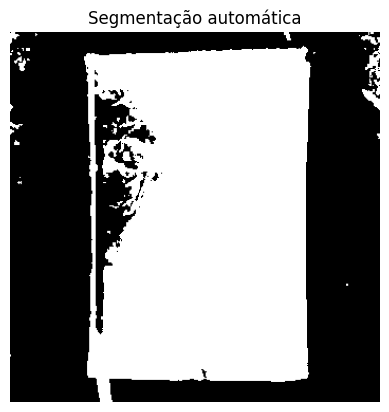

IoU Original: 87.62%, IoU Invertida: 2.27%
Correspondência para livro_C_3_escuro.jpg:
IoU Original = 87.62%, IoU Invertida = 2.27% (sobreposição suficientemente alta).
5


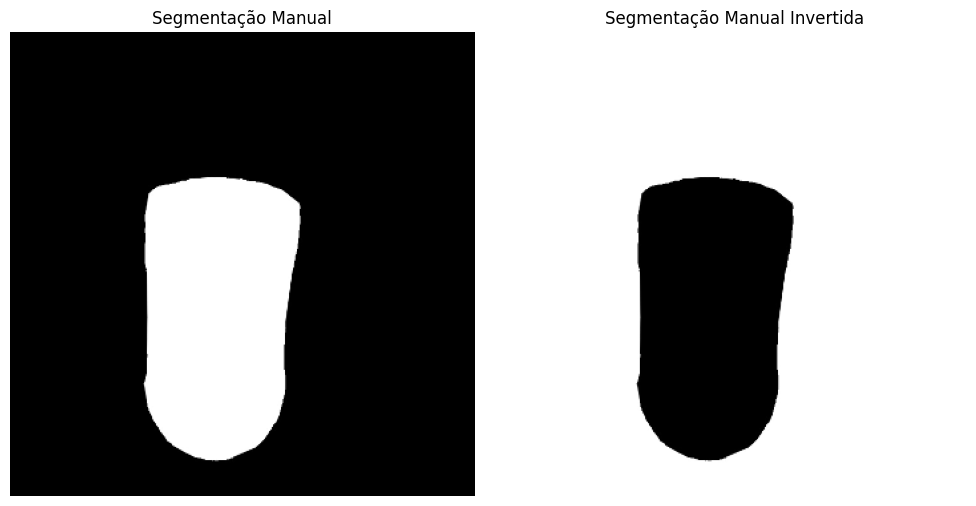

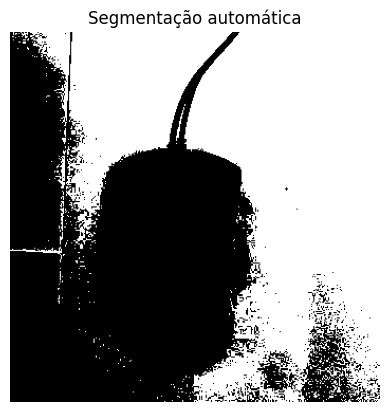

IoU Original: 0.22%, IoU Invertida: 62.37%
Discrepância para mouse_B_3_claro.jpg:
IoU Original = 0.22%, IoU Invertida = 62.37% (sobreposição insuficiente).


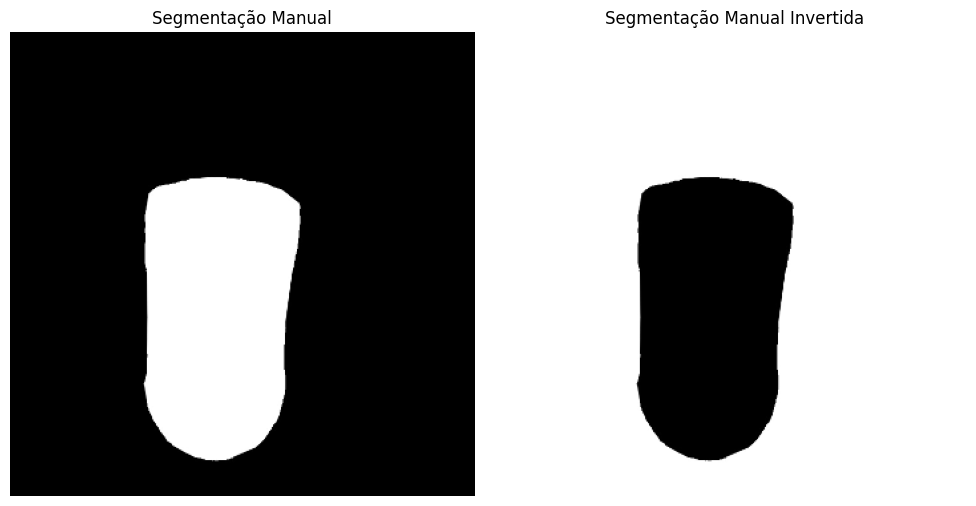

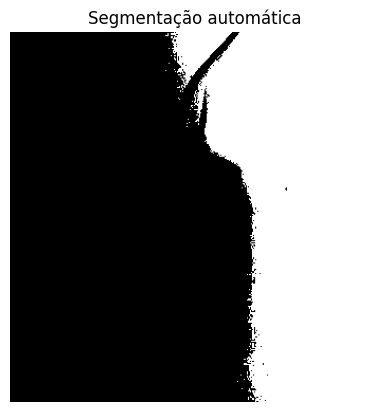

IoU Original: 0.08%, IoU Invertida: 47.92%
Discrepância para mouse_B_3_claro.jpg:
IoU Original = 0.08%, IoU Invertida = 47.92% (sobreposição insuficiente).


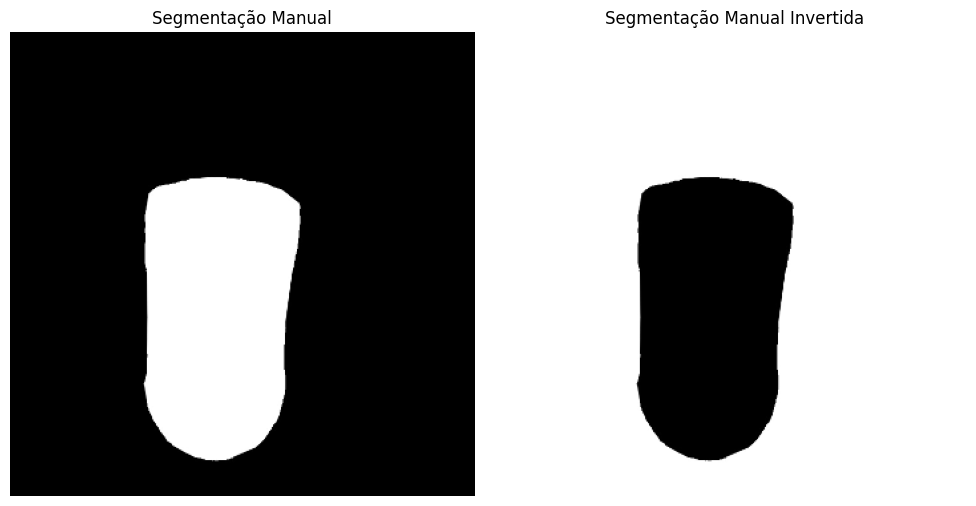

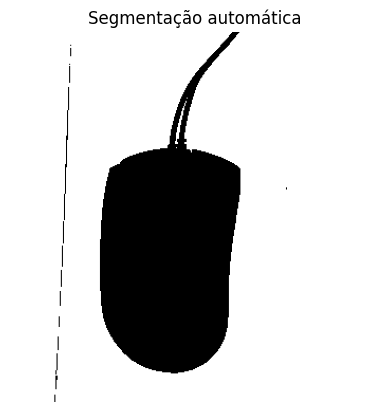

IoU Original: 0.43%, IoU Invertida: 95.22%
Correspondência para mouse_B_3_claro.jpg:
IoU Original = 0.43%, IoU Invertida = 95.22% (sobreposição suficientemente alta).


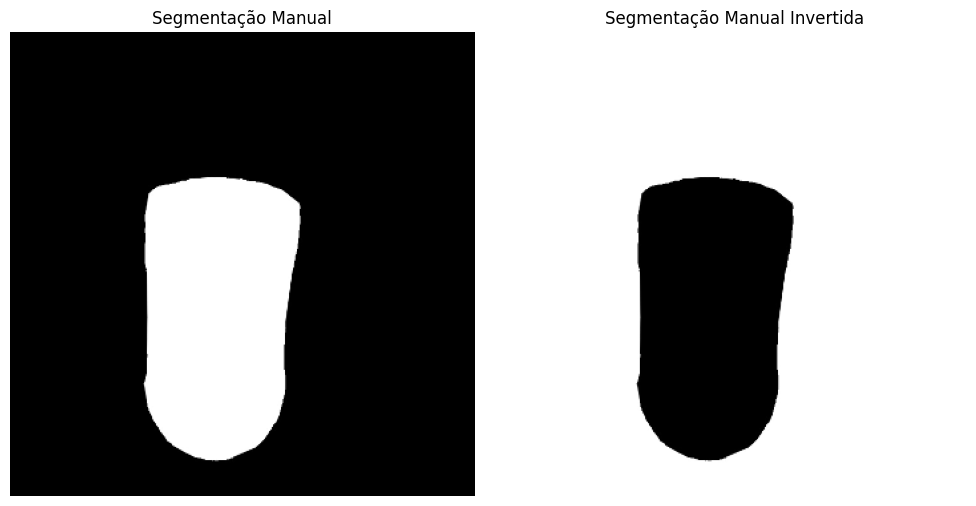

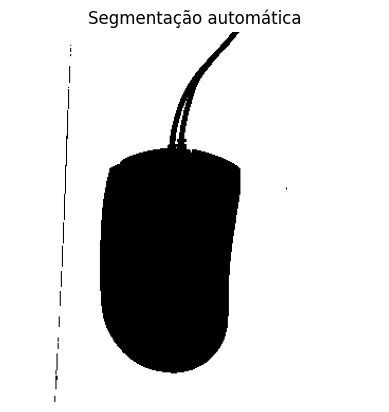

IoU Original: 0.43%, IoU Invertida: 95.24%
Correspondência para mouse_B_3_claro.jpg:
IoU Original = 0.43%, IoU Invertida = 95.24% (sobreposição suficientemente alta).


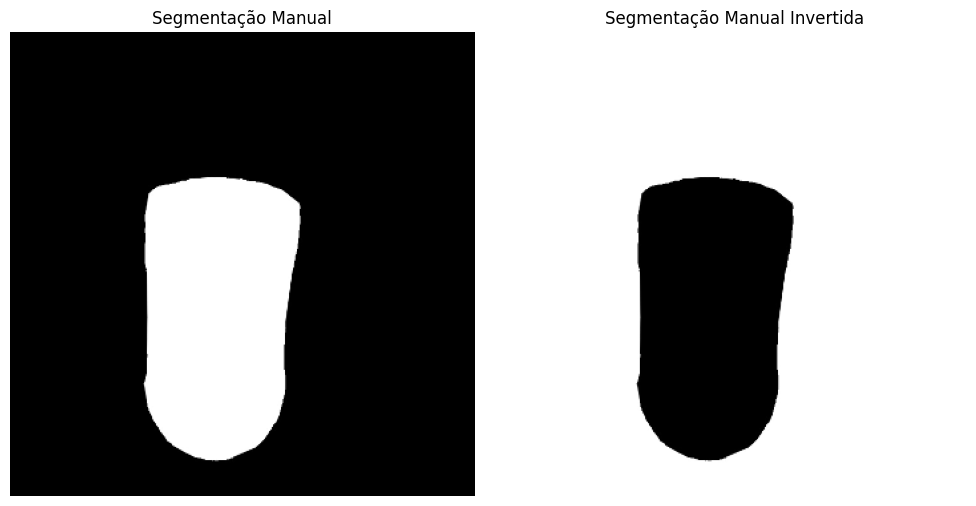

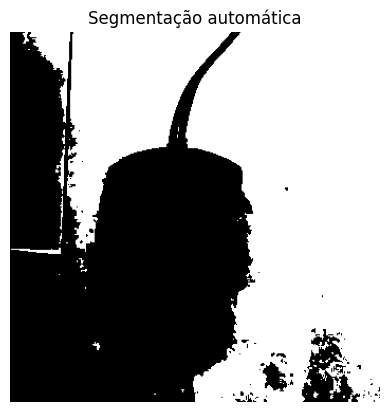

IoU Original: 0.12%, IoU Invertida: 64.47%
Discrepância para mouse_B_3_claro.jpg:
IoU Original = 0.12%, IoU Invertida = 64.47% (sobreposição insuficiente).
5


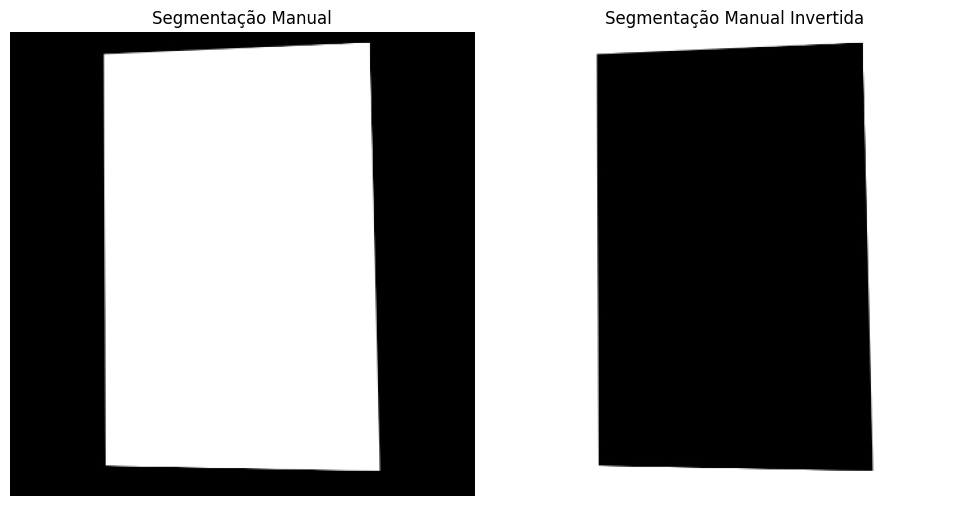

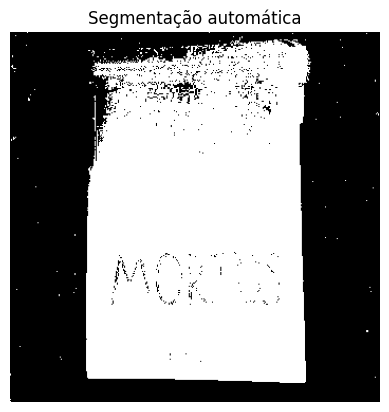

IoU Original: 91.24%, IoU Invertida: 1.54%
Correspondência para livro_B_2_escuro.jpg:
IoU Original = 91.24%, IoU Invertida = 1.54% (sobreposição suficientemente alta).


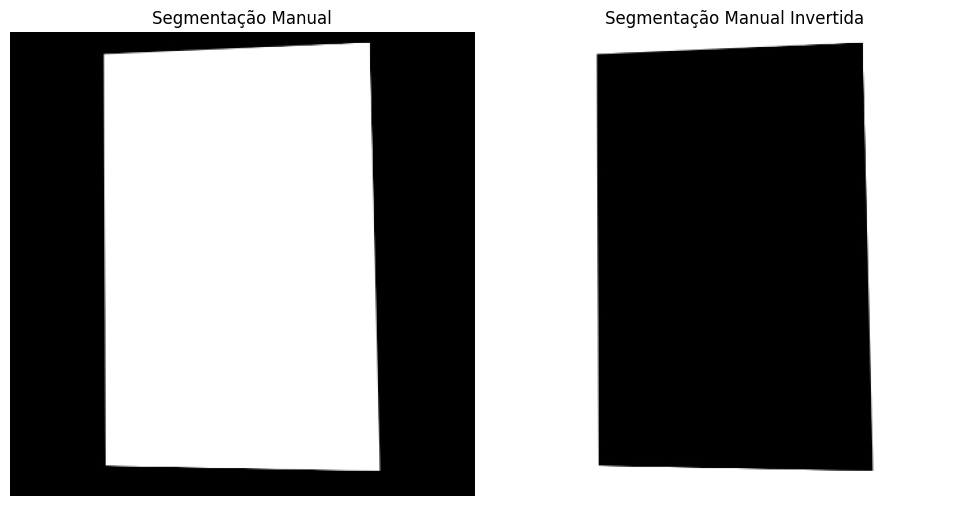

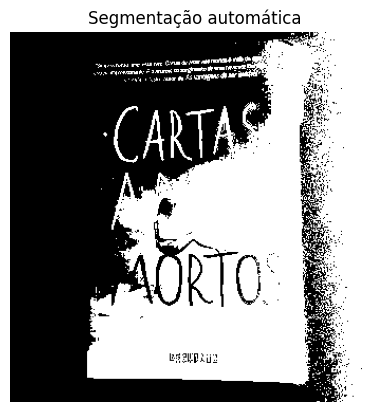

IoU Original: 47.05%, IoU Invertida: 22.37%
Discrepância para livro_B_2_escuro.jpg:
IoU Original = 47.05%, IoU Invertida = 22.37% (sobreposição insuficiente).


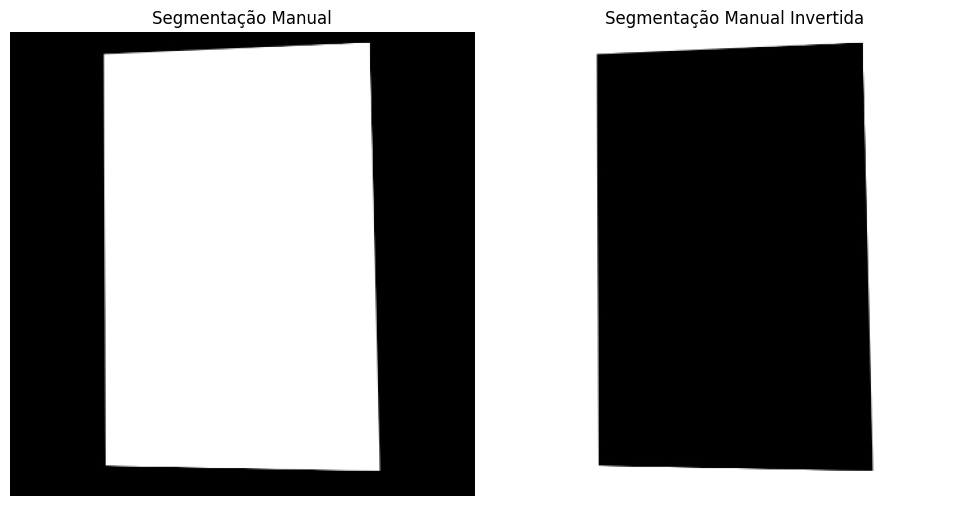

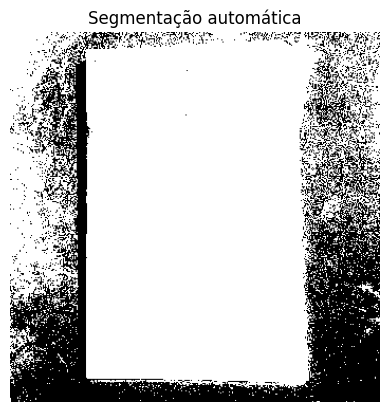

IoU Original: 70.32%, IoU Invertida: 22.90%
Correspondência para livro_B_2_escuro.jpg:
IoU Original = 70.32%, IoU Invertida = 22.90% (sobreposição suficientemente alta).


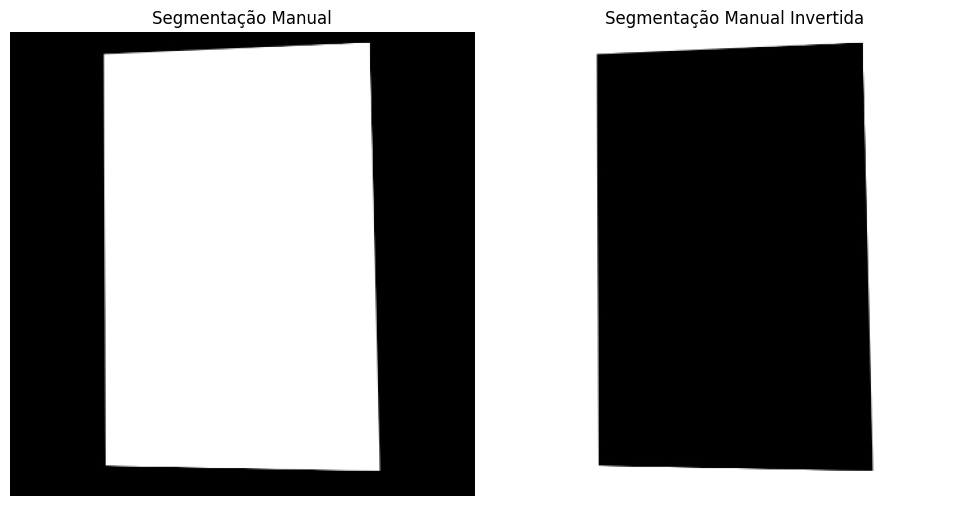

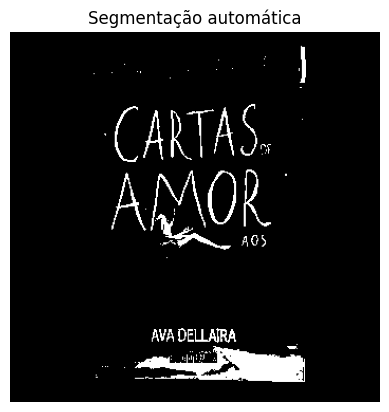

IoU Original: 9.59%, IoU Invertida: 0.40%
Discrepância para livro_B_2_escuro.jpg:
IoU Original = 9.59%, IoU Invertida = 0.40% (sobreposição insuficiente).


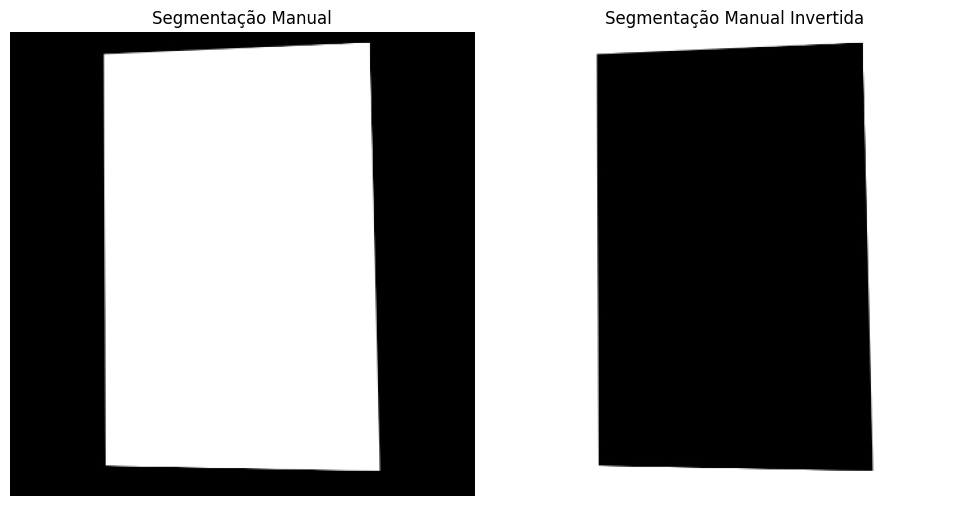

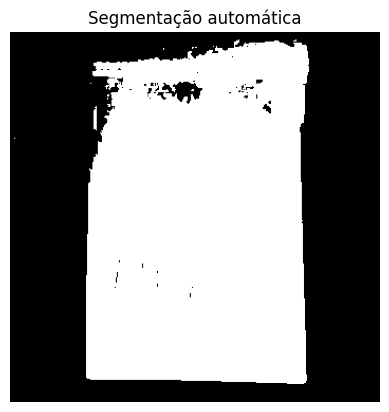

IoU Original: 91.59%, IoU Invertida: 1.72%
Correspondência para livro_B_2_escuro.jpg:
IoU Original = 91.59%, IoU Invertida = 1.72% (sobreposição suficientemente alta).
5


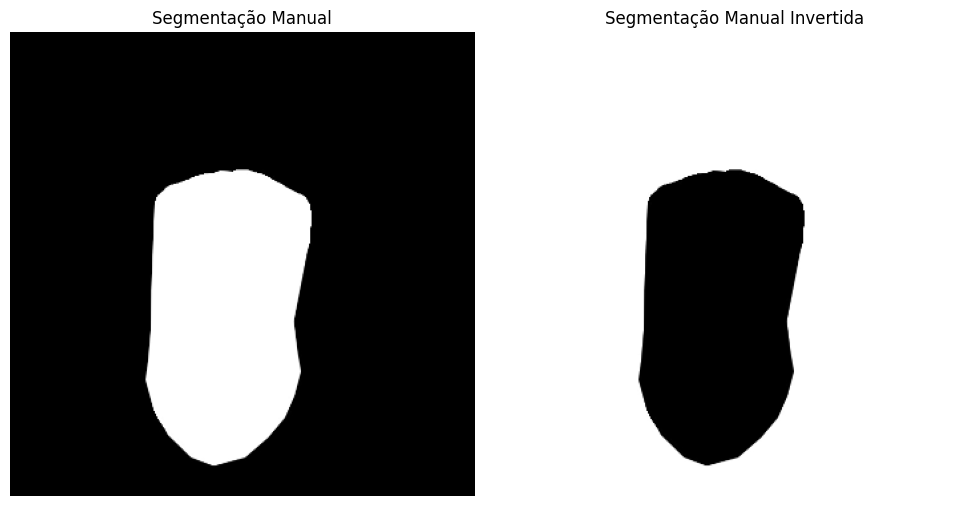

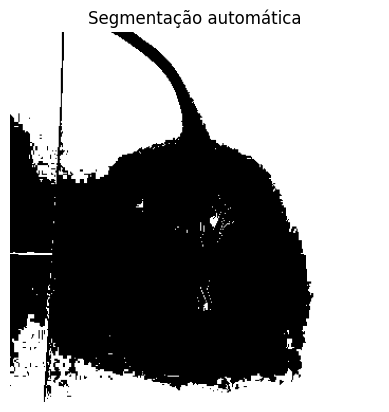

IoU Original: 0.24%, IoU Invertida: 64.51%
Discrepância para mouse_C_2_claro.jpg:
IoU Original = 0.24%, IoU Invertida = 64.51% (sobreposição insuficiente).


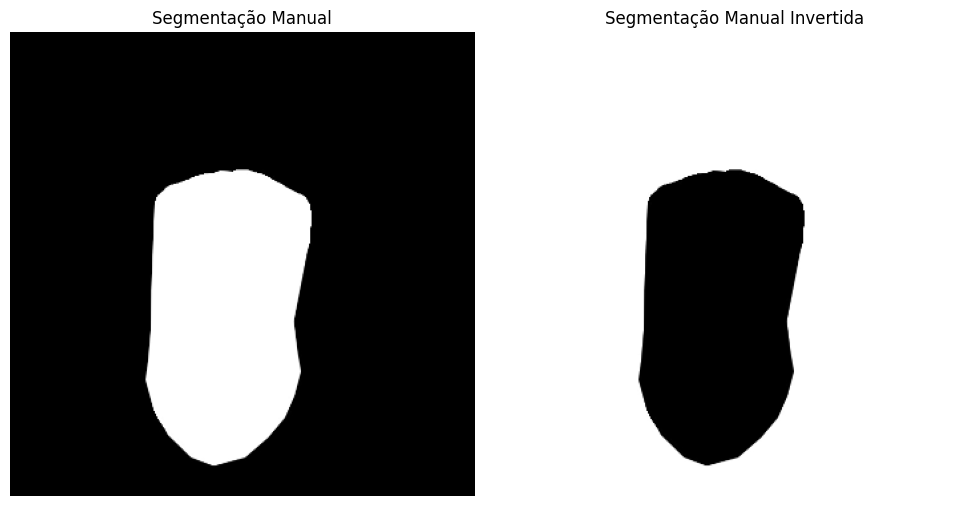

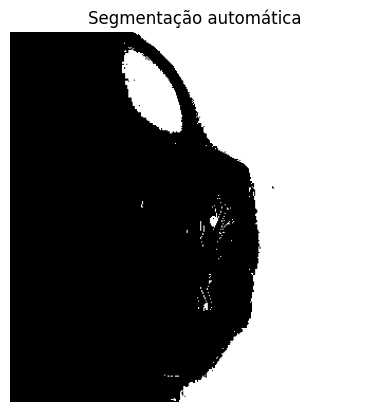

IoU Original: 0.39%, IoU Invertida: 54.34%
Discrepância para mouse_C_2_claro.jpg:
IoU Original = 0.39%, IoU Invertida = 54.34% (sobreposição insuficiente).


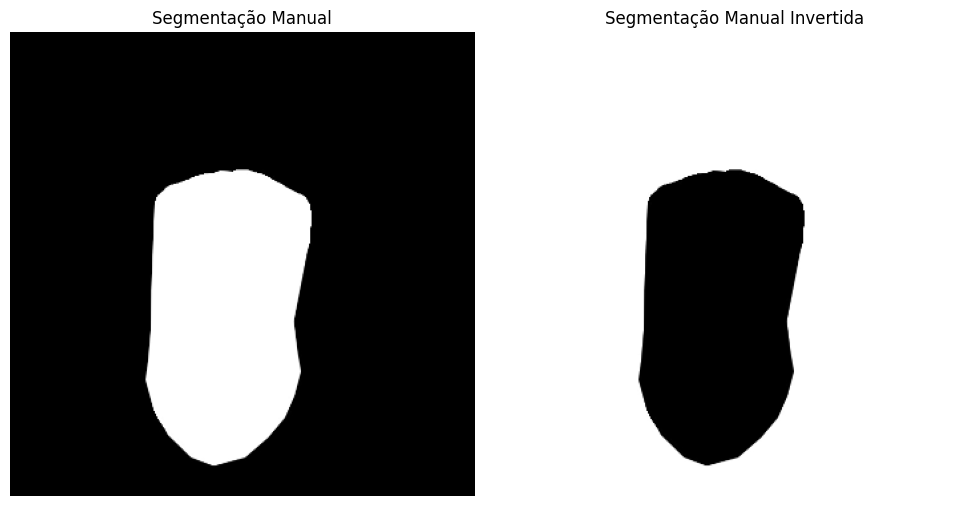

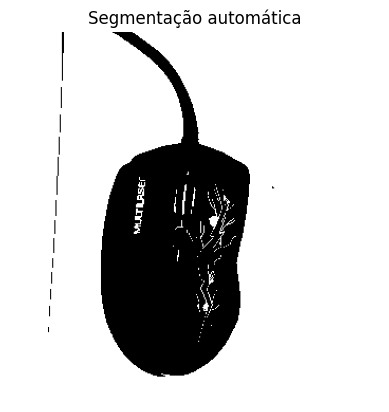

IoU Original: 1.18%, IoU Invertida: 93.69%
Correspondência para mouse_C_2_claro.jpg:
IoU Original = 1.18%, IoU Invertida = 93.69% (sobreposição suficientemente alta).


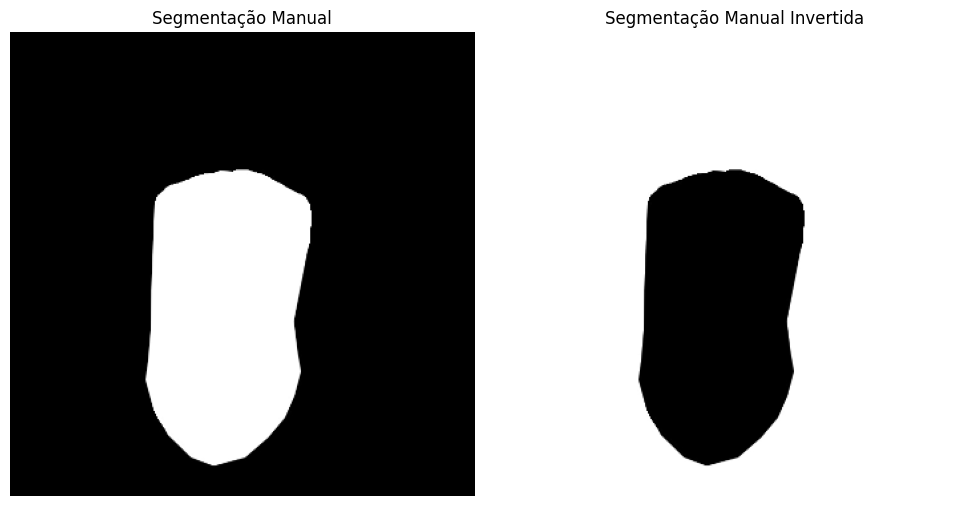

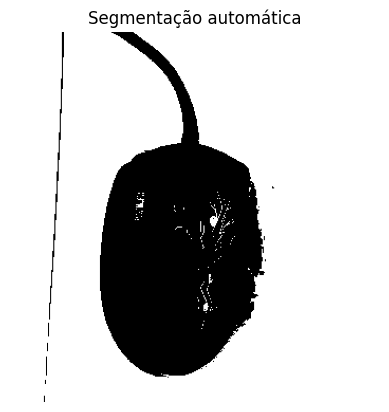

IoU Original: 0.60%, IoU Invertida: 91.79%
Correspondência para mouse_C_2_claro.jpg:
IoU Original = 0.60%, IoU Invertida = 91.79% (sobreposição suficientemente alta).


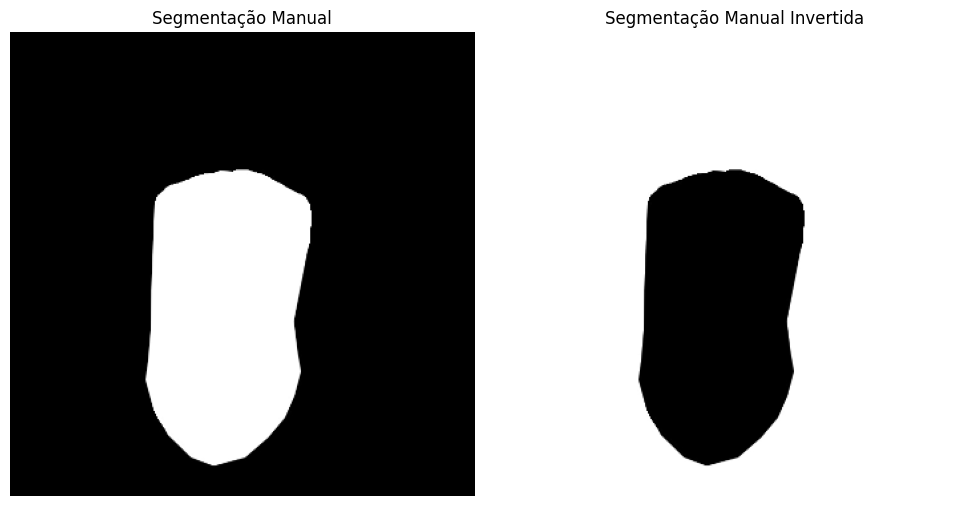

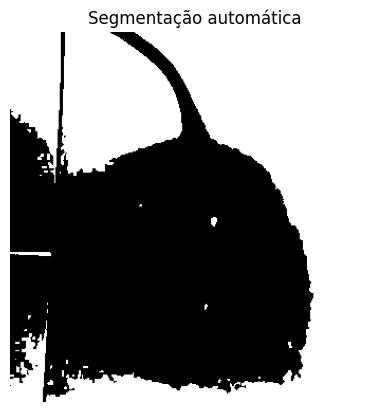

IoU Original: 0.07%, IoU Invertida: 60.98%
Discrepância para mouse_C_2_claro.jpg:
IoU Original = 0.07%, IoU Invertida = 60.98% (sobreposição insuficiente).
5


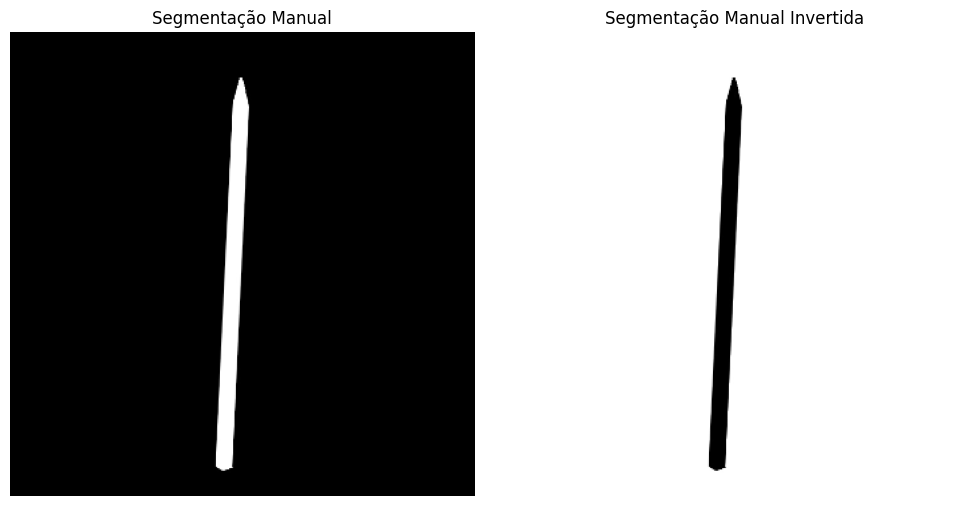

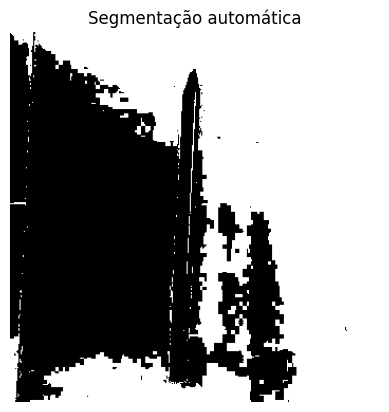

IoU Original: 0.38%, IoU Invertida: 55.23%
Discrepância para lapis_C_1_claro.jpg:
IoU Original = 0.38%, IoU Invertida = 55.23% (sobreposição insuficiente).


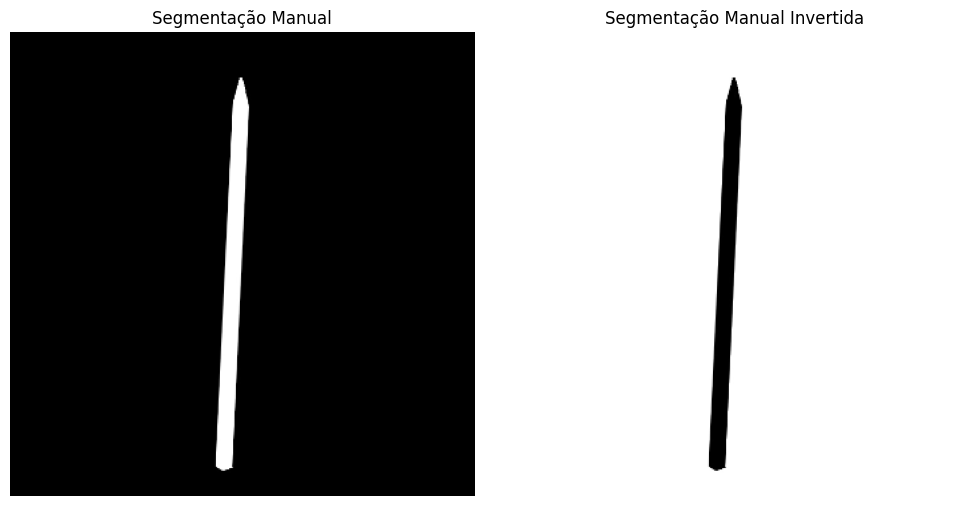

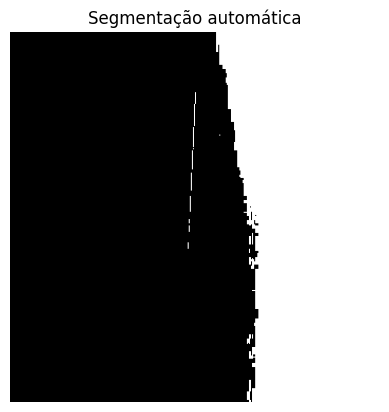

IoU Original: 0.24%, IoU Invertida: 37.86%
Discrepância para lapis_C_1_claro.jpg:
IoU Original = 0.24%, IoU Invertida = 37.86% (sobreposição insuficiente).


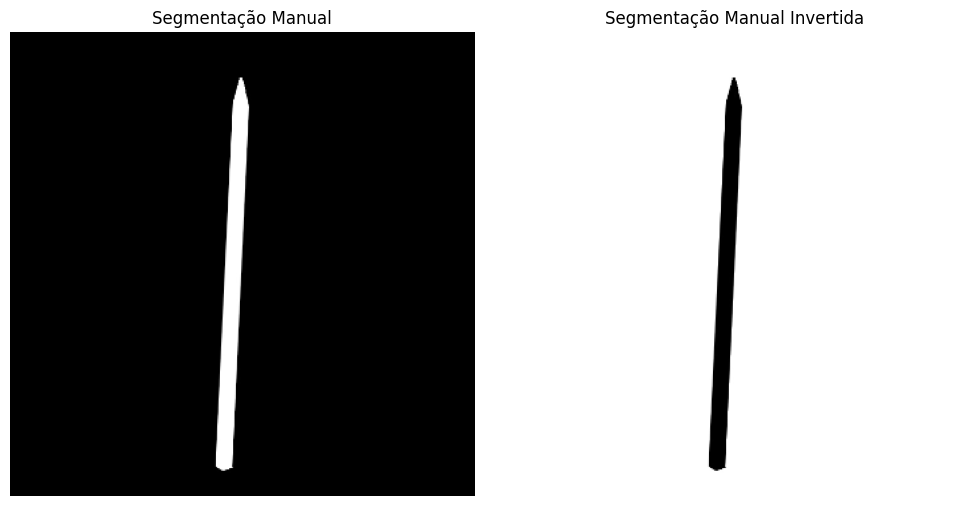

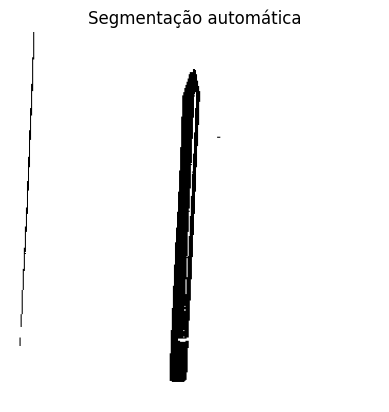

IoU Original: 0.52%, IoU Invertida: 97.92%
Correspondência para lapis_C_1_claro.jpg:
IoU Original = 0.52%, IoU Invertida = 97.92% (sobreposição suficientemente alta).


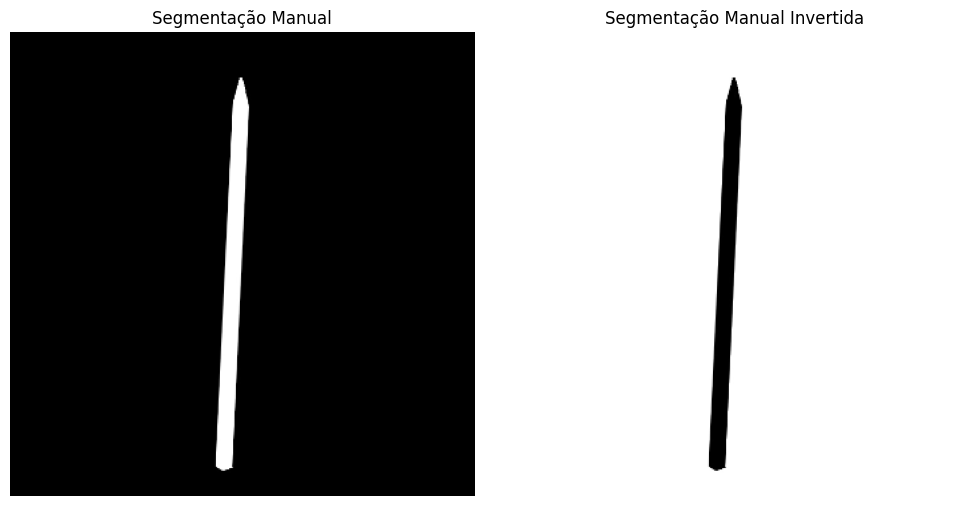

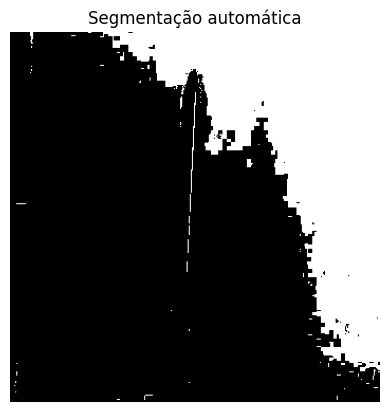

IoU Original: 0.45%, IoU Invertida: 29.23%
Discrepância para lapis_C_1_claro.jpg:
IoU Original = 0.45%, IoU Invertida = 29.23% (sobreposição insuficiente).


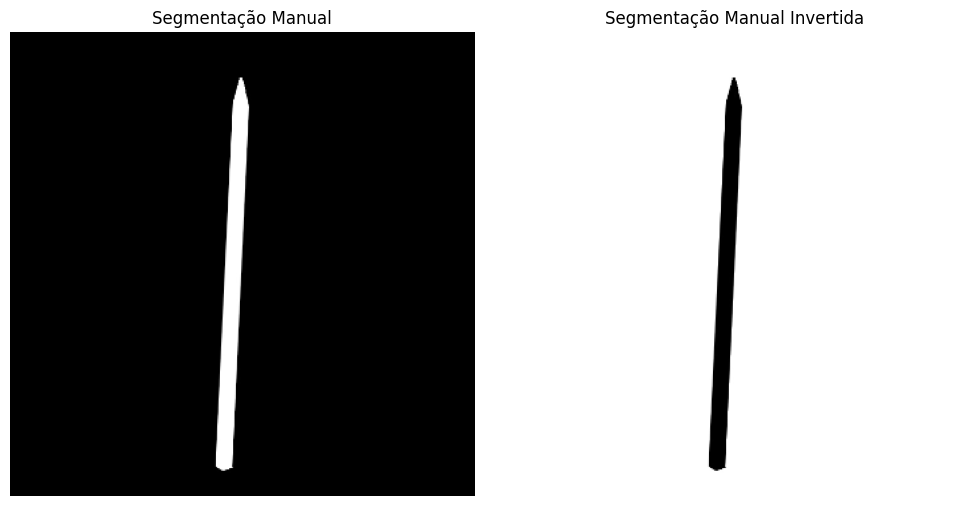

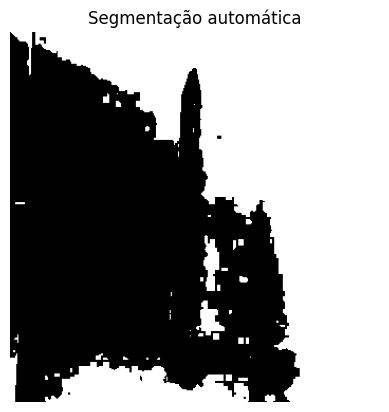

IoU Original: 0.06%, IoU Invertida: 49.59%
Discrepância para lapis_C_1_claro.jpg:
IoU Original = 0.06%, IoU Invertida = 49.59% (sobreposição insuficiente).
5


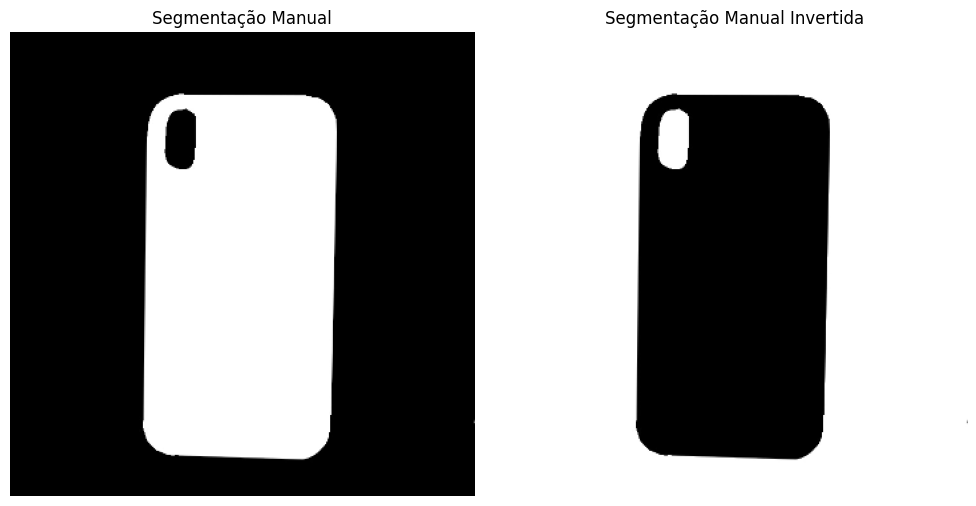

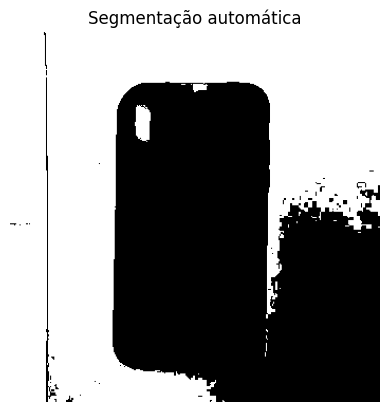

IoU Original: 0.44%, IoU Invertida: 72.92%
Correspondência para capinha_C_2_claro.jpg:
IoU Original = 0.44%, IoU Invertida = 72.92% (sobreposição suficientemente alta).


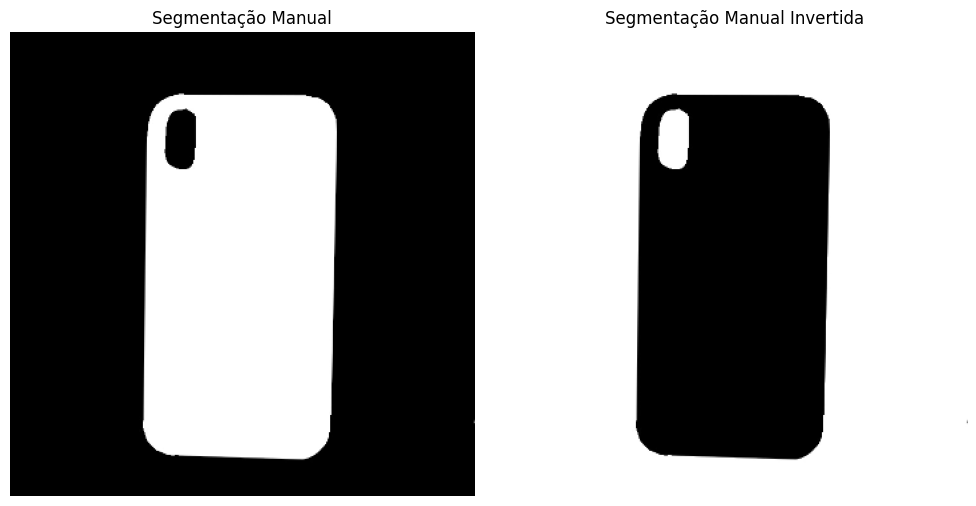

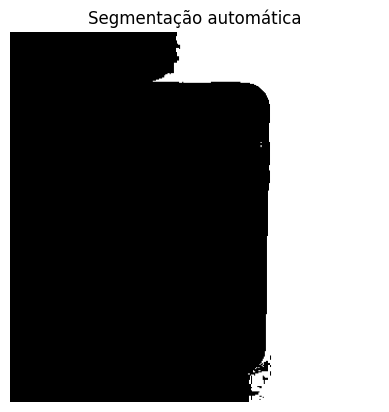

IoU Original: 0.34%, IoU Invertida: 48.49%
Discrepância para capinha_C_2_claro.jpg:
IoU Original = 0.34%, IoU Invertida = 48.49% (sobreposição insuficiente).


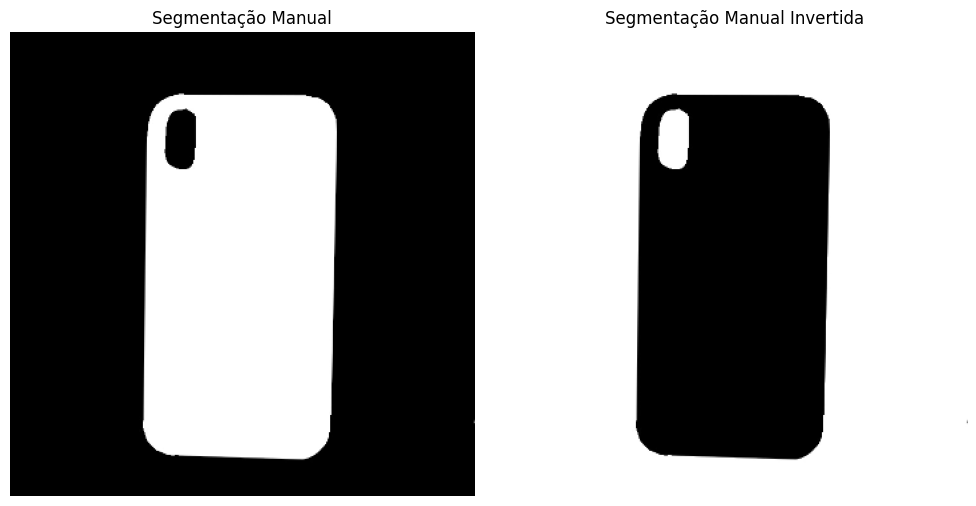

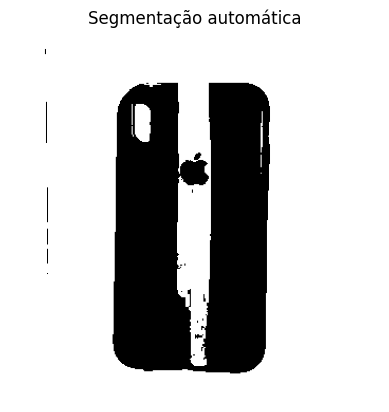

IoU Original: 5.96%, IoU Invertida: 90.59%
Correspondência para capinha_C_2_claro.jpg:
IoU Original = 5.96%, IoU Invertida = 90.59% (sobreposição suficientemente alta).


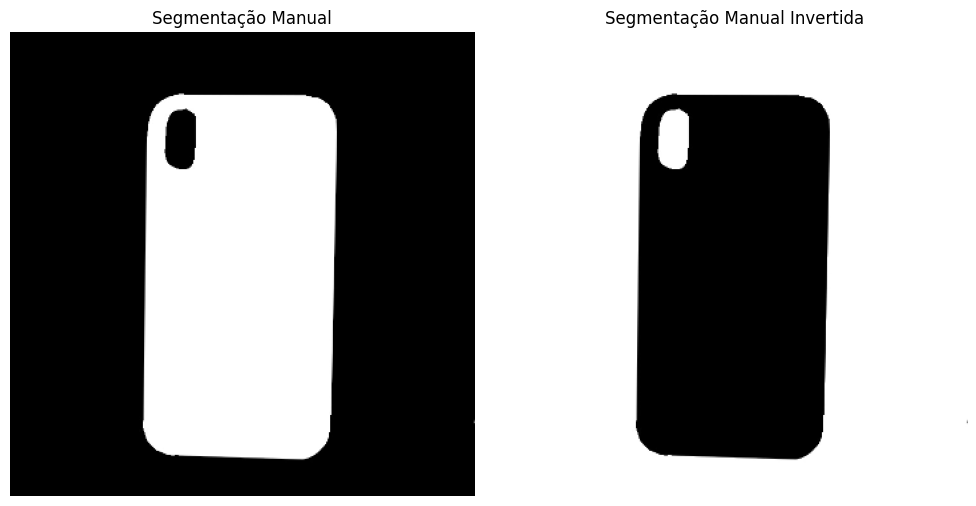

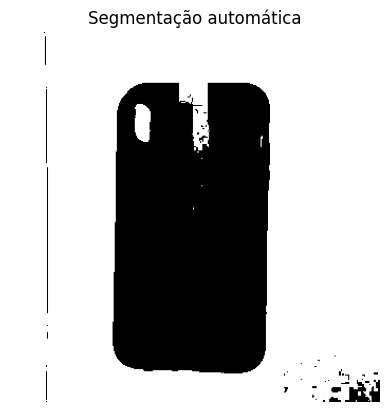

IoU Original: 1.34%, IoU Invertida: 95.29%
Correspondência para capinha_C_2_claro.jpg:
IoU Original = 1.34%, IoU Invertida = 95.29% (sobreposição suficientemente alta).


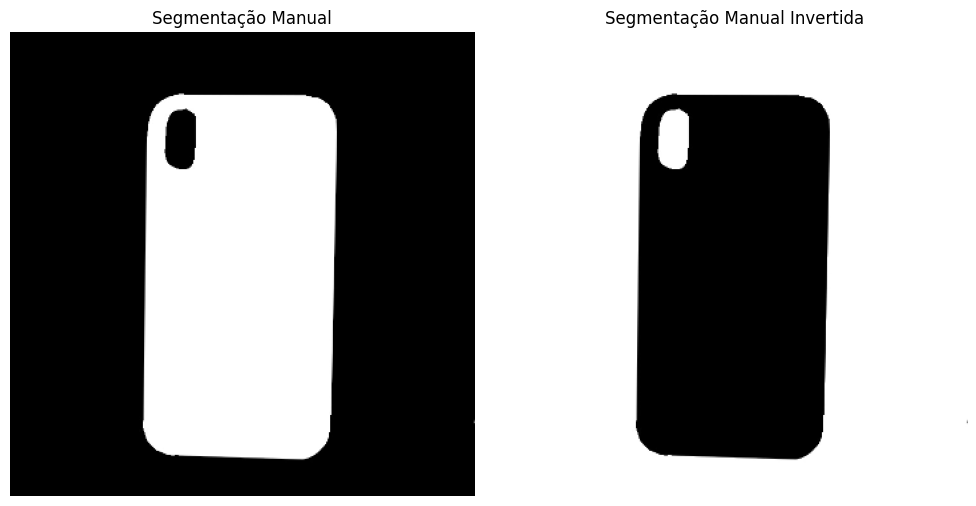

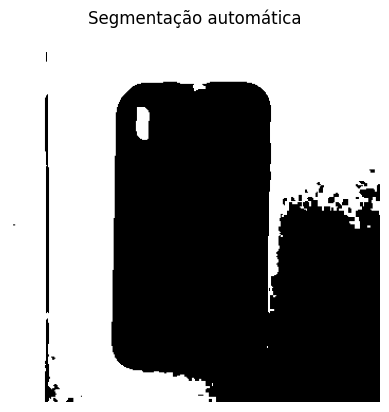

IoU Original: 0.28%, IoU Invertida: 70.93%
Correspondência para capinha_C_2_claro.jpg:
IoU Original = 0.28%, IoU Invertida = 70.93% (sobreposição suficientemente alta).


In [ ]:
def ground_truth(imagens_seg_manual, imagens_seg_aut):
    caminhos_manual = set([imagem['caminho'].split('/')[-1] for imagem in imagens_seg_manual])
    caminhos_aut = set([imagem['caminho'].split('/')[-1] for imagem in imagens_seg_aut])

    imagens_em_comum = caminhos_manual.intersection(caminhos_aut)

    # Avaliar a correspondência entre as imagens
    for caminho_imagem in imagens_em_comum:

        imagem_manual = [imagem['imagem'] for imagem in imagens_seg_manual if imagem['caminho'].split('/')[-1] == caminho_imagem]
        imagem_aut = [imagem['imagem'] for imagem in imagens_seg_aut if imagem['caminho'].split('/')[-1] == caminho_imagem]

        print(len(imagem_aut))

        for seg_aut in imagem_aut:

            seg_manual = imagem_manual[0]
            seg_manual_invertida = cv2.bitwise_not(seg_manual)

            fig, axs = plt.subplots(1, 2, figsize=(10, 5))
            axs[0].imshow(seg_manual, cmap='gray')
            axs[0].set_title("Segmentação Manual")
            axs[0].axis('off')
            axs[1].imshow(seg_manual_invertida, cmap='gray')
            axs[1].set_title("Segmentação Manual Invertida")
            axs[1].axis('off')
            plt.tight_layout()
            plt.show()

            plt.imshow(seg_aut, cmap='gray')
            plt.title('Segmentação automática')
            plt.axis('off')
            plt.show()

            # Calcular a interseção e a união entre a segmentação manual original e a invertida
            intersecao_manual = np.logical_and(seg_manual, seg_aut)
            uniao_manual = np.logical_or(seg_manual, seg_aut)
            iou_manual = np.sum(intersecao_manual) / np.sum(uniao_manual)

            # Calcular a interseção e a união entre a segmentação manual invertida e a automática
            intersecao_invertida = np.logical_and(seg_manual_invertida, seg_aut)
            uniao_invertida = np.logical_or(seg_manual_invertida, seg_aut)
            iou_invertida = np.sum(intersecao_invertida) / np.sum(uniao_invertida)

            # Exibir os resultados do IoU
            print(f"IoU Original: {iou_manual:.2%}, IoU Invertida: {iou_invertida:.2%}")

            # Avaliar a correspondência com base nos valores de IoU
            if iou_manual > 0.7 or iou_invertida > 0.7:
                print(f"Correspondência para {caminho_imagem}:")
                print(f"IoU Original = {iou_manual:.2%}, IoU Invertida = {iou_invertida:.2%} (sobreposição suficientemente alta).")
            else:
                print(f"Discrepância para {caminho_imagem}:")
                print(f"IoU Original = {iou_manual:.2%}, IoU Invertida = {iou_invertida:.2%} (sobreposição insuficiente).")
ground_truth(imagens_seg_manual, imagens_seg_aut)


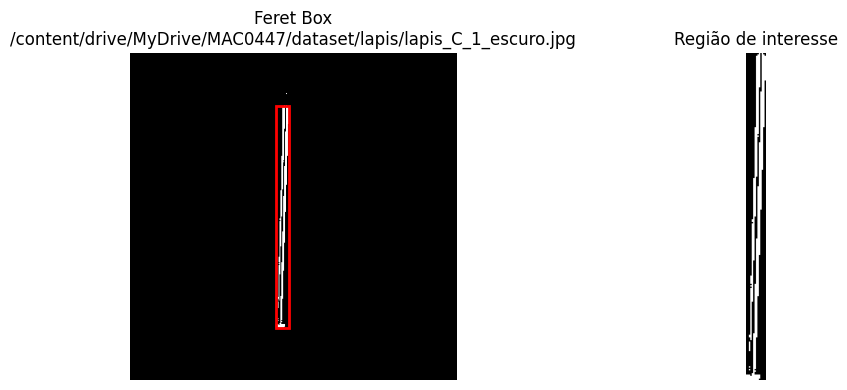

In [ ]:
# extração da feret box

from matplotlib.patches import Rectangle

def feret_box(imagem):
    imagem_binaria = imagem['imagem']
    contornos, _ = cv2.findContours(imagem_binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    maior_contorno = max(contornos, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(maior_contorno)
    feret_box = imagem_binaria[y:y+h, x:x+w]

    imagem_feret_box = {
        'classe': imagem['classe'],
        'caminho': imagem['caminho'],
        'feret_box': feret_box,
        'imagem': imagem_binaria,
        'bounding_box': (x, y, w, h)
    }

    return imagem_feret_box

imagens_feret_box = []
for imagem in imagens_seg_aut:
    imagem_processada = feret_box(imagem)
    imagens_feret_box.append(imagem_processada)
imagens_feret_box = np.array(imagens_feret_box)

# plot
index_img = 278
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].imshow(imagens_feret_box[index_img]['imagem'], cmap='gray')
axs[0].set_title(f"Feret Box\n{imagens_feret_box[index_img]['caminho']}")
axs[0].axis('off')
x, y, w, h = imagens_feret_box[index_img]['bounding_box']
rect = Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
axs[0].add_patch(rect)

axs[1].imshow(imagens_feret_box[index_img]['feret_box'], cmap='gray')
axs[1].set_title(f"Região de interesse")
axs[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# extração de características

def imagens_caracteristicas(imagem):
    img = imagem['imagem']
    x, y = img.shape
    caracteristicas = np.reshape(img, (x*y))

    imagem_processada = {
        'classe': imagem['classe'],
        'caminho': imagem['caminho'],
        'imagem': imagem['imagem'],
        'caracteristicas': caracteristicas
    }

    return imagem_processada

dataset = []
for imagem_feret_box in imagens_feret_box:
    imagem_processada = imagens_caracteristicas(imagem_feret_box)
    dataset.append(imagem_processada)
dataset = np.array(dataset)

index_img = 278
print('\n\nFeature Array\n\n', dataset[index_img]['caracteristicas'])




Feature Array

 [0 0 0 ... 0 0 0]


In [ ]:
# classificador

from sklearn.metrics import accuracy_score

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import time

knc = KNeighborsClassifier(3)
l_svm = SVC(kernel="linear", C=0.025, random_state=42)
rbf_svm = SVC(gamma=2, C=1, random_state=42)
gp = GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42)
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
rf = RandomForestClassifier(
    max_depth=5, n_estimators=10, max_features=1, random_state=42
)
nn = MLPClassifier(alpha=1, max_iter=1000, random_state=42)
ab = AdaBoostClassifier(random_state=42)
gnb = GaussianNB()
qda = QuadraticDiscriminantAnalysis()

def treina_classificador(dataset, classificador, titulo):
    X = np.array([imagem['caracteristicas'] for imagem in dataset])
    y = np.array([imagem['classe'] for imagem in dataset])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    start_time = time.time()

    model = classificador.fit(X_train, y_train)
    preds = classificador.predict(X_test)

    end_time = time.time()
    tempo_treinamento = end_time - start_time

    accuracy = accuracy_score(y_test, preds)
    print(f"Classificador: {titulo}")
    print(f"  - Acurácia: {accuracy:.4f}")
    print(f"  - Tempo de treinamento: {tempo_treinamento:.2f} segundos\n")

    return accuracy, tempo_treinamento

resultados = []

resultados.append(treina_classificador(dataset, knc, "Nearest Neighbors"))
#resultados.append(treina_classificador(dataset, l_svm, "Linear SVM"))
#resultados.append(treina_classificador(dataset, rbf_svm, "RBF SVM"))
#resultados.append(treina_classificador(dataset, gp, "Gaussian Process"))
#resultados.append(treina_classificador(dataset, dt, "Decision Tree"))
#resultados.append(treina_classificador(dataset, rf, "Random Forest"))
#resultados.append(treina_classificador(dataset, nn, "Neural Net"))
#resultados.append(treina_classificador(dataset, ab, "AdaBoost"))
#resultados.append(treina_classificador(dataset, gnb, "Naive Bayes"))
#resultados.append(treina_classificador(dataset, qda, "QDA"))

melhor_classificador_idx = np.argmax([resultado[0] for resultado in resultados])
melhor_classificador_nome = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process", "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", "Naive Bayes", "QDA"][melhor_classificador_idx]

print(f"\nMelhor classificador: {melhor_classificador_nome} com acurácia {resultados[melhor_classificador_idx][0]:.4f} e tempo de treinamento {resultados[melhor_classificador_idx][1]:.2f} segundos")

'''
Classificador: Nearest Neighbors
  - Acurácia: 0.8056
  - Tempo de treinamento: 3.11 segundos

Classificador: Linear SVM
  - Acurácia: 0.9167
  - Tempo de treinamento: 99.06 segundos

Classificador: RBF SVM
  - Acurácia: 0.1944
  - Tempo de treinamento: 186.57 segundos

Classificador: Gaussian Process
  - Acurácia: 0.2278
  - Tempo de treinamento: 1713.81 segundos

Classificador: Decision Tree
  - Acurácia: 0.6556
  - Tempo de treinamento: 16.64 segundos

Classificador: Random Forest
  - Acurácia: 0.6556
  - Tempo de treinamento: 0.39 segundos

Classificador: Neural Net
  - Acurácia: 0.8722
  - Tempo de treinamento: 412.71 segundos

Classificador: AdaBoost
  - Acurácia: 0.5167
  - Tempo de treinamento: 270.55 segundos

Classificador: Naive Bayes
  - Acurácia: 0.4611
  - Tempo de treinamento: 6.46 segundos

Classificador: QDA
  - Acurácia: 0.4167
  - Tempo de treinamento: 62.24 segundos


Melhor classificador: Linear SVM com acurácia 0.9167 e tempo de treinamento 99.06 segundos

Linear SVM > Neural Net > Nearest Neighbors
'''

Classificador: Nearest Neighbors
  - Acurácia: 0.8222
  - Tempo de treinamento: 0.97 segundos


Melhor classificador: Nearest Neighbors com acurácia 0.8222 e tempo de treinamento 0.97 segundos


'\nClassificador: Nearest Neighbors\n  - Acurácia: 0.8056\n  - Tempo de treinamento: 3.11 segundos\n\nClassificador: Linear SVM\n  - Acurácia: 0.9167\n  - Tempo de treinamento: 99.06 segundos\n\nClassificador: RBF SVM\n  - Acurácia: 0.1944\n  - Tempo de treinamento: 186.57 segundos\n\nClassificador: Gaussian Process\n  - Acurácia: 0.2278\n  - Tempo de treinamento: 1713.81 segundos\n\nClassificador: Decision Tree\n  - Acurácia: 0.6556\n  - Tempo de treinamento: 16.64 segundos\n\nClassificador: Random Forest\n  - Acurácia: 0.6556\n  - Tempo de treinamento: 0.39 segundos\n\nClassificador: Neural Net\n  - Acurácia: 0.8722\n  - Tempo de treinamento: 412.71 segundos\n\nClassificador: AdaBoost\n  - Acurácia: 0.5167\n  - Tempo de treinamento: 270.55 segundos\n\nClassificador: Naive Bayes\n  - Acurácia: 0.4611\n  - Tempo de treinamento: 6.46 segundos\n\nClassificador: QDA\n  - Acurácia: 0.4167\n  - Tempo de treinamento: 62.24 segundos\n\n\nMelhor classificador: Linear SVM com acurácia 0.9167 e 

In [ ]:
# função que faz o processamento de uma imagem

def processa_imagem(imagem):
    processamentos = [RGB2GRAY, gradiente, logaritmo, exponencial,
                      media_convolucao, normalizacao, segmentacao_automatica,
                      feret_box, imagens_caracteristicas]

    for processamento in processamentos:
        imagem = processamento(imagem)

    return imagem

In [ ]:
# teste com uma nova imagem

# usando todos os processamentos de imagem
imagem = imagens[45]
imagem = processa_imagem(imagem)
imagem['caracteristicas'] = imagem['caracteristicas'].reshape(1, -1)
previsao = knc.predict(imagem['caracteristicas'])
print(f"A classe prevista para a nova imagem é: {previsao[0]}")

# usando apenas o rgb2gray e as caracteristicas
imagem = RGB2GRAY(imagens[45])
imagem = imagens_caracteristicas(imagem)
imagem['caracteristicas'] = imagem['caracteristicas'].reshape(1, -1)
previsao = knc.predict(imagem['caracteristicas'])
print(f"A classe prevista para a nova imagem é: {previsao[0]}")


A classe prevista para a nova imagem é: livro
A classe prevista para a nova imagem é: livro


In [ ]:
# exportando o modelo de classificação
import pickle

with open('modelo_knc.pkl', 'wb') as arquivo_modelo:
    pickle.dump(knc, arquivo_modelo)

In [ ]:
# exemplo de como carregar modelo
with open('modelo_knc.pkl', 'rb') as arquivo_modelo:
    modelo_carregado = pickle.load(arquivo_modelo)

# usando todos os processamentos de imagem
imagem = imagens[45]
imagem = processa_imagem(imagem)
imagem['caracteristicas'] = imagem['caracteristicas'].reshape(1, -1)
previsao = modelo_carregado.predict(imagem['caracteristicas'])
print(imagem['caracteristicas'])
print(f"A classe prevista para a nova imagem é: {previsao[0]}")

# usando apenas o rgb2gray e as caracteristicas
imagem = RGB2GRAY(imagens[45])
imagem = imagens_caracteristicas(imagem)
imagem['caracteristicas'] = imagem['caracteristicas'].reshape(1, -1)
previsao = modelo_carregado.predict(imagem['caracteristicas'])
print(f"A classe prevista para a nova imagem é: {previsao[0]}")

[[255 255 255 ... 255 255 255]]
A classe prevista para a nova imagem é: livro
A classe prevista para a nova imagem é: livro
